In [1]:
import numpy as np
import matplotlib.pyplot as plt

main_data = np.loadtxt("Data.dat")

time = main_data[:, 0] # [JD]
observed = main_data[:, 1] #[differential magnitude]
calculated=main_data[:,2] # [differential magntiude]
reesiduals=main_data[:,3] # [differential magntiude]
point_weight=main_data[:,4] 
point_error=main_data[:,5]

# Cargar periodos
periodos = np.loadtxt("freqs.per")
# Obtener frecuencias y parámetros de los periodos
freq = periodos[1, 0]/86400  # Frecuencia principal en [Hz]
amp = periodos[1, 1]   # Amplitud
phase = periodos[1, 2] # Fase
     #Armonicos
freqh1 = periodos[0, 0]/86400  # [Hz] 
amph1 = periodos[0, 1]   
phaseh1 = periodos[0, 2]

freqh2 = periodos[2, 0]/86400   # [Hz]
amph2 = periodos[2, 1]   
phaseh2 = periodos[2, 2]

freqh3 = periodos[3, 0]/86400   # [Hz]
amph3 = periodos[3, 1]   
phaseh3 = periodos[3, 2]

freqh4 = periodos[4, 0]/86400   # [Hz]
amph4 = periodos[4, 1]   
phaseh4 = periodos[4, 2]

freqh5 = periodos[5, 0]/86400 # [Hz]  
amph5 = periodos[5, 1]   
phaseh5 = periodos[5, 2]

#Transformada de fourier
tf=np.loadtxt("TF_2.fou")
tf_freqs=tf[:,0]/86400 # [Hz]
tf_amps=tf[:,1]

###           TF de armonicos
tfh_1=np.loadtxt("TF_1.fou")
tfh_freq_1=tfh_1[:,0]/86400 # [Hz]
tfh_amp_1=tfh_1[:,1]

tfh_2=np.loadtxt("TF_3.fou")
tfh_freq_2=tfh_2[:,0]/86400 # [Hz]
tfh_amp_2=tfh_2[:,1]

tfh_3=np.loadtxt("TF_res_1.fou")
tfh_freq_3=tfh_3[:,0]/86400 # [Hz]
tfh_amp_3=tfh_3[:,1]

tfh_4=np.loadtxt("TF_res_2.fou")
tfh_freq_4=tfh_4[:,0]/86400 # [Hz]
tfh_amp_4=tfh_4[:,1]

tfh_5=np.loadtxt("TF_res_3.fou")
tfh_freq_5=tfh_5[:,0]/86400 # [Hz]
tfh_amp_5=tfh_5[:,1]

#Spectral window

tf_spectral_window=np.loadtxt("Spectral_window.fou")
tf_spectral_window_freq=tf_spectral_window[:,0]/86400 # [Hz]
tf_spectral_window_amp=tf_spectral_window[:,1]

#Frequencies folded with spectral window
tf_folded_w_sw=np.loadtxt("f2_ffwsw.fou") 
tf_fwsw_freq=tf_folded_w_sw[:,0]/86400 # [Hz]
tf_fwsw_amp=tf_folded_w_sw[:,1]
    # harmonics freqs

tfh_folded_w_sw_1=np.loadtxt("f1_ffwsw.fou") 
tfh_fwsw_freq_1=tfh_folded_w_sw_1[:,0]/86400 # [Hz]
tfh_fwsw_amp_1=tfh_folded_w_sw_1[:,1]

tfh_folded_w_sw_2=np.loadtxt("f3_ffwsw.fou") 
tfh_fwsw_freq_2=tfh_folded_w_sw_2[:,0]/86400 # [Hz]
tfh_fwsw_amp_2=tfh_folded_w_sw_2[:,1]

tfh_folded_w_sw_3=np.loadtxt("f4_ffwsw.fou") 
tfh_fwsw_freq_3=tfh_folded_w_sw_3[:,0]/86400 # [Hz]
tfh_fwsw_amp_3=tfh_folded_w_sw_3[:,1]

tfh_folded_w_sw_4=np.loadtxt("f5_ffwsw.fou") 
tfh_fwsw_freq_4=tfh_folded_w_sw_4[:,0]/86400 # [Hz]
tfh_fwsw_amp_4=tfh_folded_w_sw_4[:,1]

tfh_folded_w_sw_5=np.loadtxt("f6_ffwsw.fou") 
tfh_fwsw_freq_5=tfh_folded_w_sw_5[:,0]/86400 # [Hz]
tfh_fwsw_amp_5=tfh_folded_w_sw_5[:,1]

#Spectrums noises
noise_spectrum=np.loadtxt("Spectrum_noise_original_data.dat")
ns_freqs=noise_spectrum[:,0]/86400 # [Hz]
ns_noise_amp=noise_spectrum[:,1]
  #residuals spectrum noise
noise_spectrum_residuals=np.loadtxt("Spectrum_noise_residuals.dat")
ns_freqs_res=noise_spectrum[:,0]/86400 # [Hz]
ns_res_noise_amp=noise_spectrum[:,1]

#Noise at frequencies
freq_noices=np.loadtxt("Noise_frequencies.dat")

f=freq# [Hz]
f_noise_amp=freq_noices[1,1]
f_snr=freq_noices[1,2]
### noise freq at harmonics
fh1=freqh1
fh1_noise_amp=freq_noices[0,1]
fh1_snr=freq_noices[0,2]

fh2=freqh2
fh2_noise_amp=freq_noices[2,1]
fh2_snr=freq_noices[2,2]

fh3=freqh3
fh3_noise_amp=freq_noices[3,1]
fh3_snr=freq_noices[3,2]

fh4=freqh4
fh4_noise_amp=freq_noices[4,1]
fh4_snr=freq_noices[4,2]

fh5=freqh5
fh5_noise_amp=freq_noices[5,1]
fh5_snr=freq_noices[5,2]


In [2]:
# Estadísticas básicas de los datos
print(f"Tiempo total de observación: {time[-1]-time[0]:.2f} días")
print(f"Número de puntos: {len(time)}")
print(f"Rango de magnitud: {observed.min():.3f} a {observed.max():.3f}")
print(f"Error típico: {point_error.mean():.4f}")

Tiempo total de observación: 0.18 días
Número de puntos: 1646
Rango de magnitud: -0.082 a 0.306
Error típico: 0.0079


In [3]:
print(time[-1]-time[0])

0.17995999986305833


In [4]:
import numpy as np
import matplotlib.pyplot as plt

main_data = np.loadtxt("Data.dat")

timejd = main_data[:, 0] # [JD]
jd_fraction = timejd % 1
time = jd_fraction * 24 # [hrs]
observed = main_data[:, 1] #[differential magnitude]
calculated=main_data[:,2] # [differential magntiude]
residuals=main_data[:,3] # [differential magntiude]
point_weight=main_data[:,4] 
point_error=main_data[:,5]

# Cargar periodos
periodos = np.loadtxt("freqs.per")
# Obtener frecuencias y parámetros de los periodos
freq = periodos[1, 0]/86400  # Frecuencia principal en [Hz]
amp = periodos[1, 1]   # Amplitud
phase = periodos[1, 2] # Fase
     #Armonicos
freqh1 = periodos[0, 0]/86400  # [Hz] 
amph1 = periodos[0, 1]   
phaseh1 = periodos[0, 2]

freqh2 = periodos[2, 0]/86400   # [Hz]
amph2 = periodos[2, 1]   
phaseh2 = periodos[2, 2]

freqh3 = periodos[3, 0]/86400   # [Hz]
amph3 = periodos[3, 1]   
phaseh3 = periodos[3, 2]

freqh4 = periodos[4, 0]/86400   # [Hz]
amph4 = periodos[4, 1]   
phaseh4 = periodos[4, 2]

freqh5 = periodos[5, 0]/86400 # [Hz]  
amph5 = periodos[5, 1]   
phaseh5 = periodos[5, 2]

#Transformada de fourier
tf=np.loadtxt("TF_2.fou")
tf_freqs=tf[:,0]/86400 # [Hz]
tf_amps=tf[:,1]

###           TF de armonicos
tfh_1=np.loadtxt("TF_1.fou")
tfh_freq_1=tfh_1[:,0]/86400 # [Hz]
tfh_amp_1=tfh_1[:,1]

tfh_2=np.loadtxt("TF_3.fou")
tfh_freq_2=tfh_2[:,0]/86400 # [Hz]
tfh_amp_2=tfh_2[:,1]

tfh_3=np.loadtxt("TF_res_1.fou")
tfh_freq_3=tfh_3[:,0]/86400 # [Hz]
tfh_amp_3=tfh_3[:,1]

tfh_4=np.loadtxt("TF_res_2.fou")
tfh_freq_4=tfh_4[:,0]/86400 # [Hz]
tfh_amp_4=tfh_4[:,1]

tfh_5=np.loadtxt("TF_res_3.fou")
tfh_freq_5=tfh_5[:,0]/86400 # [Hz]
tfh_amp_5=tfh_5[:,1]

#Spectral window

tf_spectral_window=np.loadtxt("Spectral_window.fou")
tf_spectral_window_freq=tf_spectral_window[:,0]/86400 # [Hz]
tf_spectral_window_amp=tf_spectral_window[:,1]

#Frequencies folded with spectral window
tf_folded_w_sw=np.loadtxt("f2_ffwsw.fou") 
tf_fwsw_freq=tf_folded_w_sw[:,0]/86400 # [Hz]
tf_fwsw_amp=tf_folded_w_sw[:,1]
    # harmonics freqs

tfh_folded_w_sw_1=np.loadtxt("f1_ffwsw.fou") 
tfh_fwsw_freq_1=tfh_folded_w_sw_1[:,0]/86400 # [Hz]
tfh_fwsw_amp_1=tfh_folded_w_sw_1[:,1]

tfh_folded_w_sw_2=np.loadtxt("f3_ffwsw.fou") 
tfh_fwsw_freq_2=tfh_folded_w_sw_2[:,0]/86400 # [Hz]
tfh_fwsw_amp_2=tfh_folded_w_sw_2[:,1]

tfh_folded_w_sw_3=np.loadtxt("f4_ffwsw.fou") 
tfh_fwsw_freq_3=tfh_folded_w_sw_3[:,0]/86400 # [Hz]
tfh_fwsw_amp_3=tfh_folded_w_sw_3[:,1]

tfh_folded_w_sw_4=np.loadtxt("f5_ffwsw.fou") 
tfh_fwsw_freq_4=tfh_folded_w_sw_4[:,0]/86400 # [Hz]
tfh_fwsw_amp_4=tfh_folded_w_sw_4[:,1]

tfh_folded_w_sw_5=np.loadtxt("f6_ffwsw.fou") 
tfh_fwsw_freq_5=tfh_folded_w_sw_5[:,0]/86400 # [Hz]
tfh_fwsw_amp_5=tfh_folded_w_sw_5[:,1]

#Spectrums noises
noise_spectrum=np.loadtxt("Spectrum_noise_original_data.dat")
ns_freqs=noise_spectrum[:,0]/86400 # [Hz]
ns_noise_amp=noise_spectrum[:,1]
  #residuals spectrum noise
noise_spectrum_residuals=np.loadtxt("Spectrum_noise_residuals.dat")
ns_freqs_res=noise_spectrum[:,0]/86400 # [Hz]
ns_res_noise_amp=noise_spectrum[:,1]

#Noise at frequencies
freq_noices=np.loadtxt("Noise_frequencies.dat")

f=freq# [Hz]
f_noise_amp=freq_noices[1,1]
f_snr=freq_noices[1,2]
### noise freq at harmonics
fh1=freqh1
fh1_noise_amp=freq_noices[0,1]
fh1_snr=freq_noices[0,2]

fh2=freqh2
fh2_noise_amp=freq_noices[2,1]
fh2_snr=freq_noices[2,2]

fh3=freqh3
fh3_noise_amp=freq_noices[3,1]
fh3_snr=freq_noices[3,2]

fh4=freqh4
fh4_noise_amp=freq_noices[4,1]
fh4_snr=freq_noices[4,2]

fh5=freqh5
fh5_noise_amp=freq_noices[5,1]
fh5_snr=freq_noices[5,2]


In [6]:
# Estadísticas básicas de los datos
print(f"Tiempo total de observación: {time[-1]-time[0]:.5f} hrs")
print(f"Número de puntos: {len(time)}")
print(f"Rango de magnitud: {observed.min():.3f} a {observed.max():.3f}")
print(f"Error típico: {point_error.mean():.4f}")

Tiempo total de observación: 4.31904 hrs
Número de puntos: 1646
Rango de magnitud: -0.082 a 0.306
Error típico: 0.0079


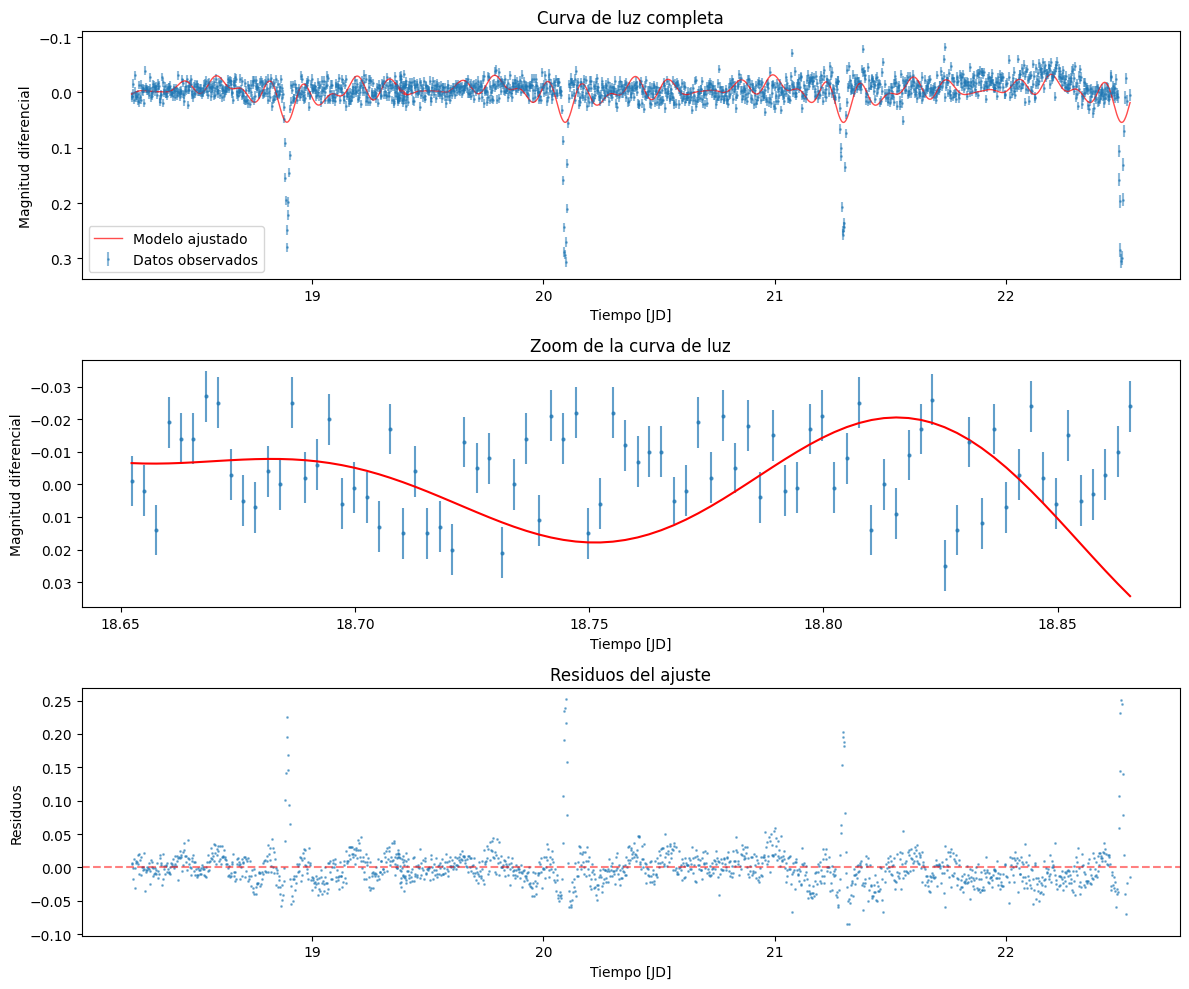

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Curva de luz completa
axes[0].errorbar(time, observed, yerr=point_error, fmt='.', markersize=2, 
                 alpha=0.5, label='Datos observados')
axes[0].plot(time, calculated, 'r-', linewidth=1, alpha=0.7, label='Modelo ajustado')
axes[0].set_xlabel('Tiempo [JD]')
axes[0].set_ylabel('Magnitud diferencial')
axes[0].set_title('Curva de luz completa')
axes[0].legend()
axes[0].invert_yaxis()  # Magnitudes más brillantes hacia arriba

# Zoom a una sección
time_span = time[-1] - time[0]
zoom_start = time[0] + 0.1*time_span
zoom_end = time[0] + 0.15*time_span
mask = (time >= zoom_start) & (time <= zoom_end)

axes[1].errorbar(time[mask], observed[mask], yerr=point_error[mask], 
                 fmt='.', markersize=4, alpha=0.7)
axes[1].plot(time[mask], calculated[mask], 'r-', linewidth=1.5)
axes[1].set_xlabel('Tiempo [JD]')
axes[1].set_ylabel('Magnitud diferencial')
axes[1].set_title('Zoom de la curva de luz')
axes[1].invert_yaxis()

# Residuos
axes[2].scatter(time, residuals, s=1, alpha=0.5)
axes[2].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[2].set_xlabel('Tiempo [JD]')
axes[2].set_ylabel('Residuos')
axes[2].set_title('Residuos del ajuste')

plt.tight_layout()
plt.show()

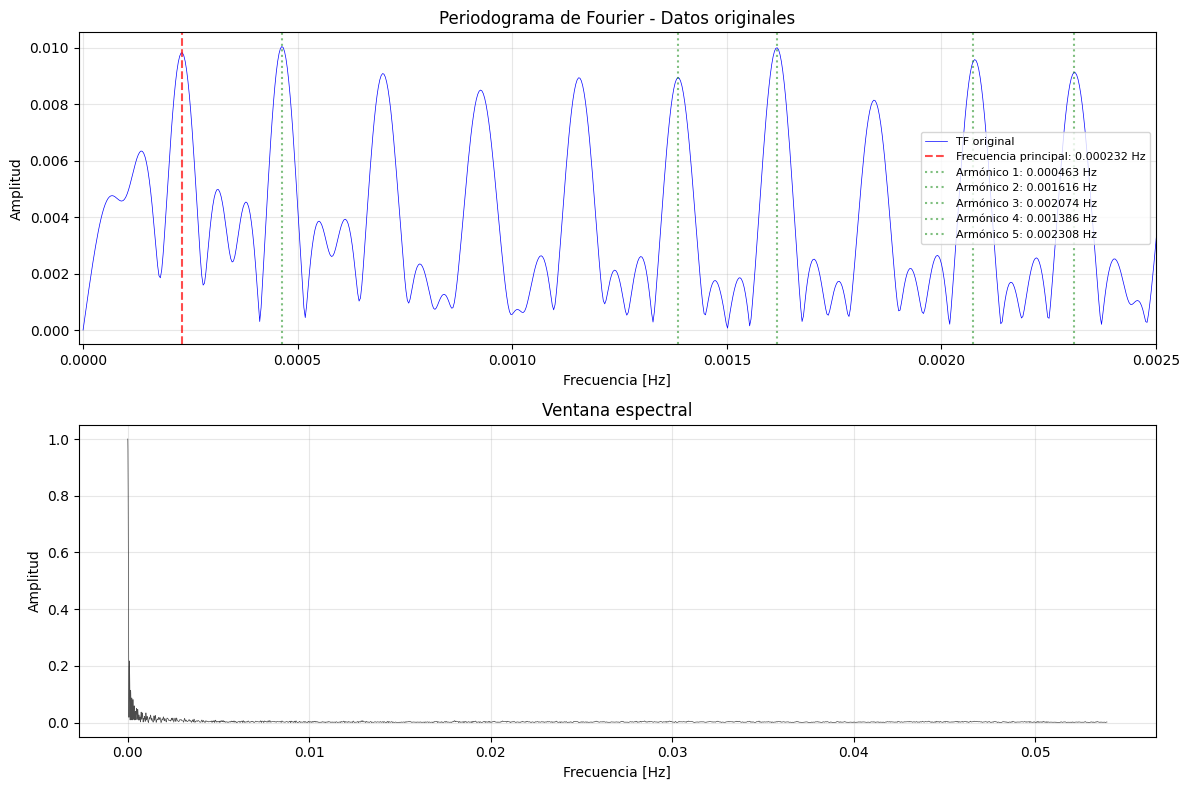

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Periodograma completo
#axes[0].plot(tf_freqs, tf_amps, 'b-', linewidth=0.5, label='TF original')
axes[0].plot(tfh_freq_1, tfh_amp_1, 'b-', linewidth=0.5, label='TF original')
axes[0].axvline(x=freq, color='r', linestyle='--', alpha=0.7, 
                label=f'Frecuencia principal: {freq:.6f} Hz')
for i, f_h in enumerate([freqh1, freqh2, freqh3, freqh4, freqh5], 1):
    axes[0].axvline(x=f_h, color='g', linestyle=':', alpha=0.5, 
                   label=f'Armónico {i}: {f_h:.6f} Hz')
axes[0].set_xlabel('Frecuencia [Hz]')
axes[0].set_ylabel('Amplitud')
axes[0].set_title('Periodograma de Fourier - Datos originales')
axes[0].legend(fontsize=8)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-0.00001,0.00250)
# Ventana espectral
axes[1].plot(tf_spectral_window_freq, tf_spectral_window_amp, 'k-', 
             linewidth=0.5, alpha=0.7)
axes[1].set_xlabel('Frecuencia [Hz]')
axes[1].set_ylabel('Amplitud')
axes[1].set_title('Ventana espectral')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

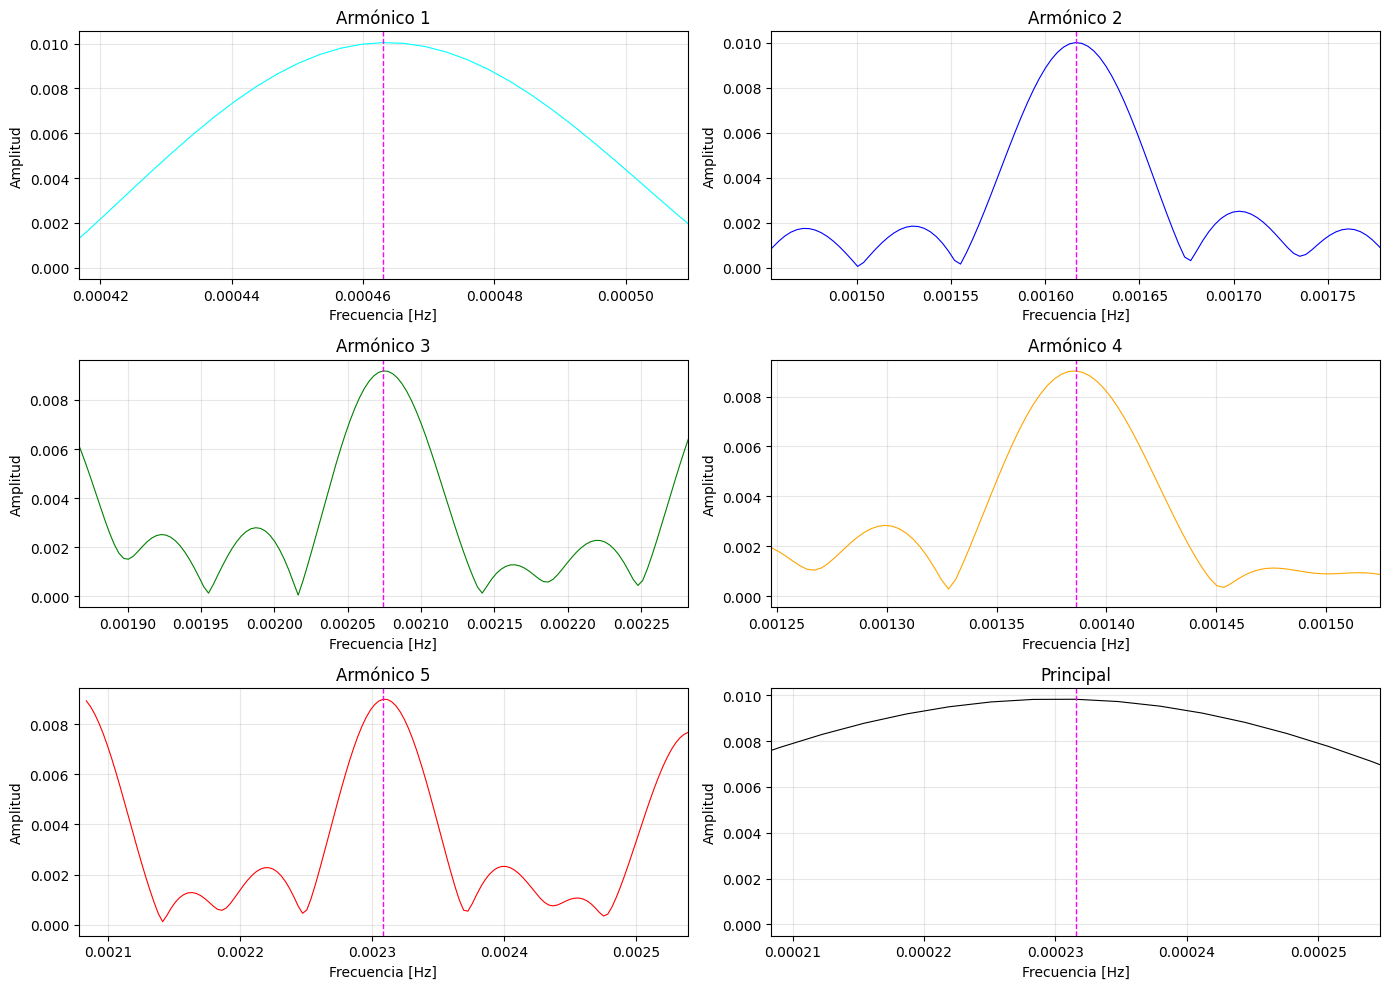

In [9]:
# Crear subplots para cada componente
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

componentes = [
    (tfh_freq_1, tfh_amp_1, freqh1, 'Armónico 1', 'Cyan'),
    (tfh_freq_2, tfh_amp_2, freqh2, 'Armónico 2', 'Blue'),
    (tfh_freq_3, tfh_amp_3, freqh3, 'Armónico 3', 'Green'),
    (tfh_freq_4, tfh_amp_4, freqh4, 'Armónico 4', 'Orange'),
    (tfh_freq_5, tfh_amp_5, freqh5, 'Armónico 5', 'Red'),
    (tf_freqs, tf_amps, freq, 'Principal', 'Black')
]

for i, (comp_freqs, comp_amps, comp_freq, title, color) in enumerate(componentes):
    axes[i].plot(comp_freqs, comp_amps, color=color, linewidth=0.8)
    axes[i].axvline(x=comp_freq, color='magenta', linestyle='--', linewidth=1)
    axes[i].set_xlabel('Frecuencia [Hz]')
    axes[i].set_ylabel('Amplitud')
    axes[i].set_title(title)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([comp_freq*0.9, comp_freq*1.1])

plt.tight_layout()
plt.show()

In [10]:
# Tabla de frecuencias detectadas y sus parámetros
print("\n" + "="*80)
print("ANÁLISIS DE FRECUENCIAS DETECTADAS")
print("="*80)

frecuencias = [
    ("Principal", f, amp, f_snr, f_noise_amp),
    ("Armónico 1", fh1, amph1, fh1_snr, fh1_noise_amp),
    ("Armónico 2", fh2, amph2, fh2_snr, fh2_noise_amp),
    ("Armónico 3", fh3, amph3, fh3_snr, fh3_noise_amp),
    ("Armónico 4", fh4, amph4, fh4_snr, fh4_noise_amp),
    ("Armónico 5", fh5, amph5, fh5_snr, fh5_noise_amp)
]

print(f"{'Componente':<15} {'Frecuencia [Hz]':<20} {'Periodo [días]':<20} "
      f"{'Amplitud':<15} {'S/N':<10} {'Ruido':<10}")
print("-"*100)

for nombre, freq_val, amp_val, snr_val, noise_val in frecuencias:
    periodo = 1/(freq_val * 86400) if freq_val != 0 else 0
    print(f"{nombre:<15} {freq_val:<20.6f} {periodo:<20.6f} "
          f"{amp_val:<15.4f} {snr_val:<10.2f} {noise_val:<10.4f}")

print("="*80)

# Cálculo de probabilidades (aproximación)
from scipy import stats

probabilidades = []
for nombre, _, _, snr_val, _ in frecuencias:
    # Probabilidad de que sea ruido (aproximación basada en S/N)
    # Asumiendo distribución normal para el ruido
    p_value = 2 * (1 - stats.norm.cdf(abs(snr_val)))
    probabilidades.append((nombre, snr_val, p_value))

print("\nANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA")
print("-"*50)
for nombre, snr, p_val in probabilidades:
    significancia = "ALTA" if p_val < 0.01 else "MEDIA" if p_val < 0.05 else "BAJA"
    print(f"{nombre:<15} S/N: {snr:6.2f} | p-valor: {p_val:.4e} | Significancia: {significancia}")


ANÁLISIS DE FRECUENCIAS DETECTADAS
Componente      Frecuencia [Hz]      Periodo [días]       Amplitud        S/N        Ruido     
----------------------------------------------------------------------------------------------------
Principal       0.000232             0.049989             0.0096          20.92      0.0005    
Armónico 1      0.000463             0.024994             0.0097          23.94      0.0004    
Armónico 2      0.001616             0.007162             0.0101          14.68      0.0007    
Armónico 3      0.002074             0.005580             0.0094          10.91      0.0009    
Armónico 4      0.001386             0.008351             0.0090          12.98      0.0007    
Armónico 5      0.002308             0.005014             0.0091          10.38      0.0009    

ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA
--------------------------------------------------
Principal       S/N:  20.92 | p-valor: 0.0000e+00 | Significancia: ALTA
Armónico 1      S/N:  23.94 |

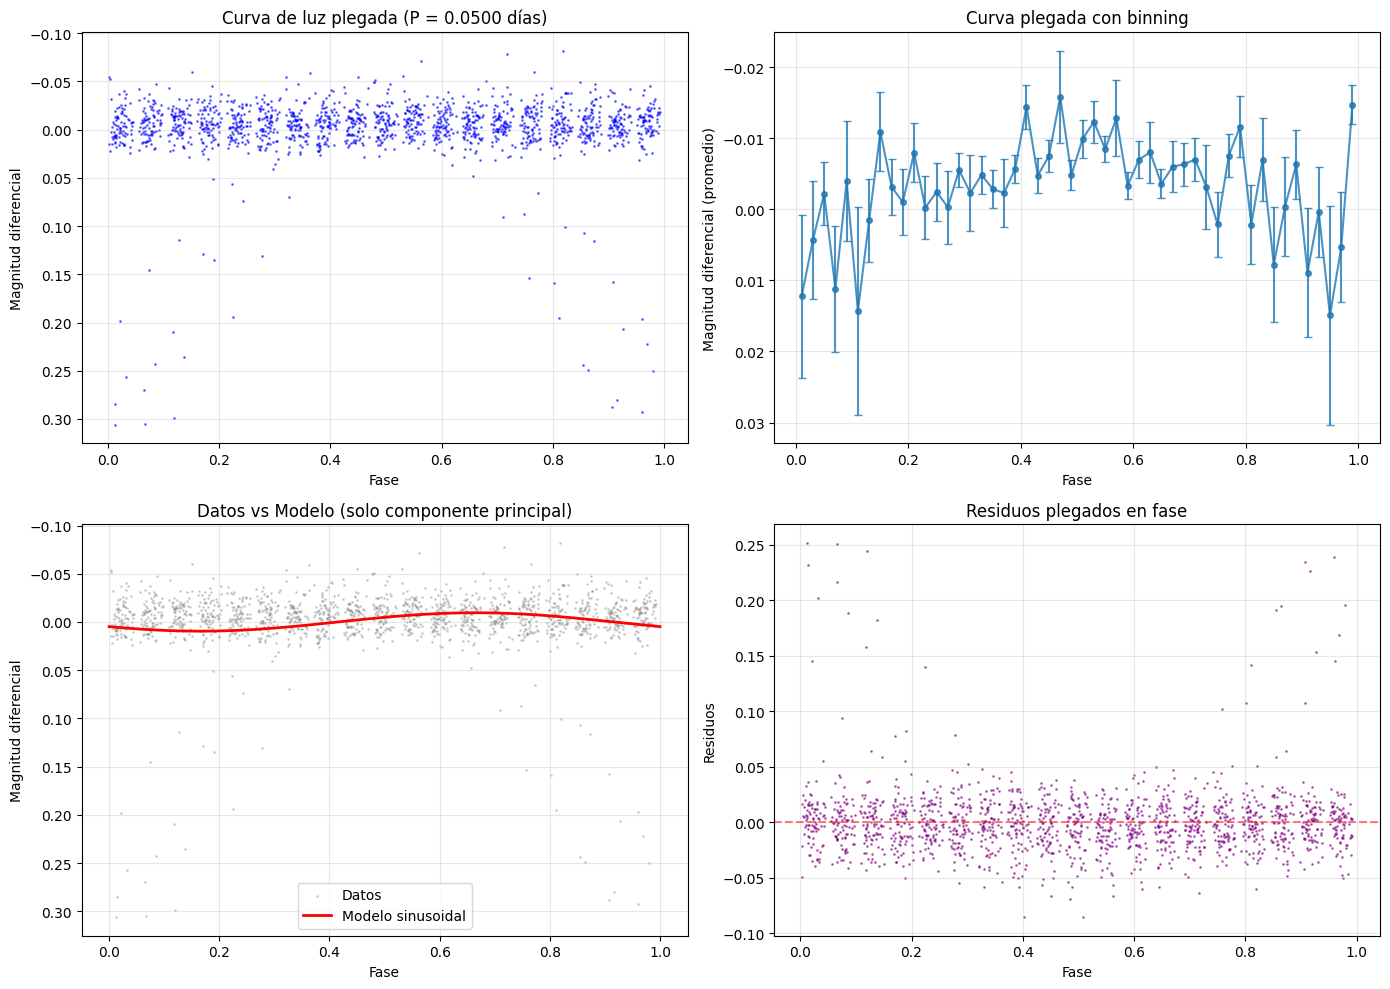

In [11]:
# Función para plegar en fase
def fold_phase(time, period, t0=0):
    """Plegar datos en fase dado un periodo"""
    phase = ((time - t0) / period) % 1
    return phase

# Calcular el periodo principal
periodo_principal = 1/(freq * 86400)  # en días

# Plegar datos con el periodo principal
phase_folded = fold_phase(time, periodo_principal)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Curva plegada con todos los datos
axes[0,0].scatter(phase_folded, observed, s=1, alpha=0.5, c='blue')
axes[0,0].set_xlabel('Fase')
axes[0,0].set_ylabel('Magnitud diferencial')
axes[0,0].set_title(f'Curva de luz plegada (P = {periodo_principal:.4f} días)')
axes[0,0].invert_yaxis()
axes[0,0].grid(True, alpha=0.3)

# Binning para mejor visualización
bin_phase = np.linspace(0, 1, 51)
bin_mean = np.zeros(len(bin_phase)-1)
bin_std = np.zeros(len(bin_phase)-1)

for i in range(len(bin_phase)-1):
    mask = (phase_folded >= bin_phase[i]) & (phase_folded < bin_phase[i+1])
    if np.sum(mask) > 0:
        bin_mean[i] = np.mean(observed[mask])
        bin_std[i] = np.std(observed[mask])/np.sqrt(np.sum(mask))

axes[0,1].errorbar((bin_phase[:-1]+bin_phase[1:])/2, bin_mean, 
                   yerr=bin_std, fmt='o-', markersize=4, 
                   capsize=3, alpha=0.8)
axes[0,1].set_xlabel('Fase')
axes[0,1].set_ylabel('Magnitud diferencial (promedio)')
axes[0,1].set_title('Curva plegada con binning')
axes[0,1].invert_yaxis()
axes[0,1].grid(True, alpha=0.3)

# Curva plegada con el modelo superpuesto
t_model = np.linspace(0, periodo_principal, 1000)
phase_model = np.linspace(0, 1, 1000)
mag_model = amp * np.sin(2*np.pi*phase_model + phase)

axes[1,0].scatter(phase_folded, observed, s=1, alpha=0.3, c='gray', label='Datos')
axes[1,0].plot(phase_model, mag_model, 'r-', linewidth=2, label='Modelo sinusoidal')
axes[1,0].set_xlabel('Fase')
axes[1,0].set_ylabel('Magnitud diferencial')
axes[1,0].set_title('Datos vs Modelo (solo componente principal)')
axes[1,0].invert_yaxis()
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Residuos plegados
axes[1,1].scatter(phase_folded, residuals, s=1, alpha=0.5, c='purple')
axes[1,1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1,1].set_xlabel('Fase')
axes[1,1].set_ylabel('Residuos')
axes[1,1].set_title('Residuos plegados en fase')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

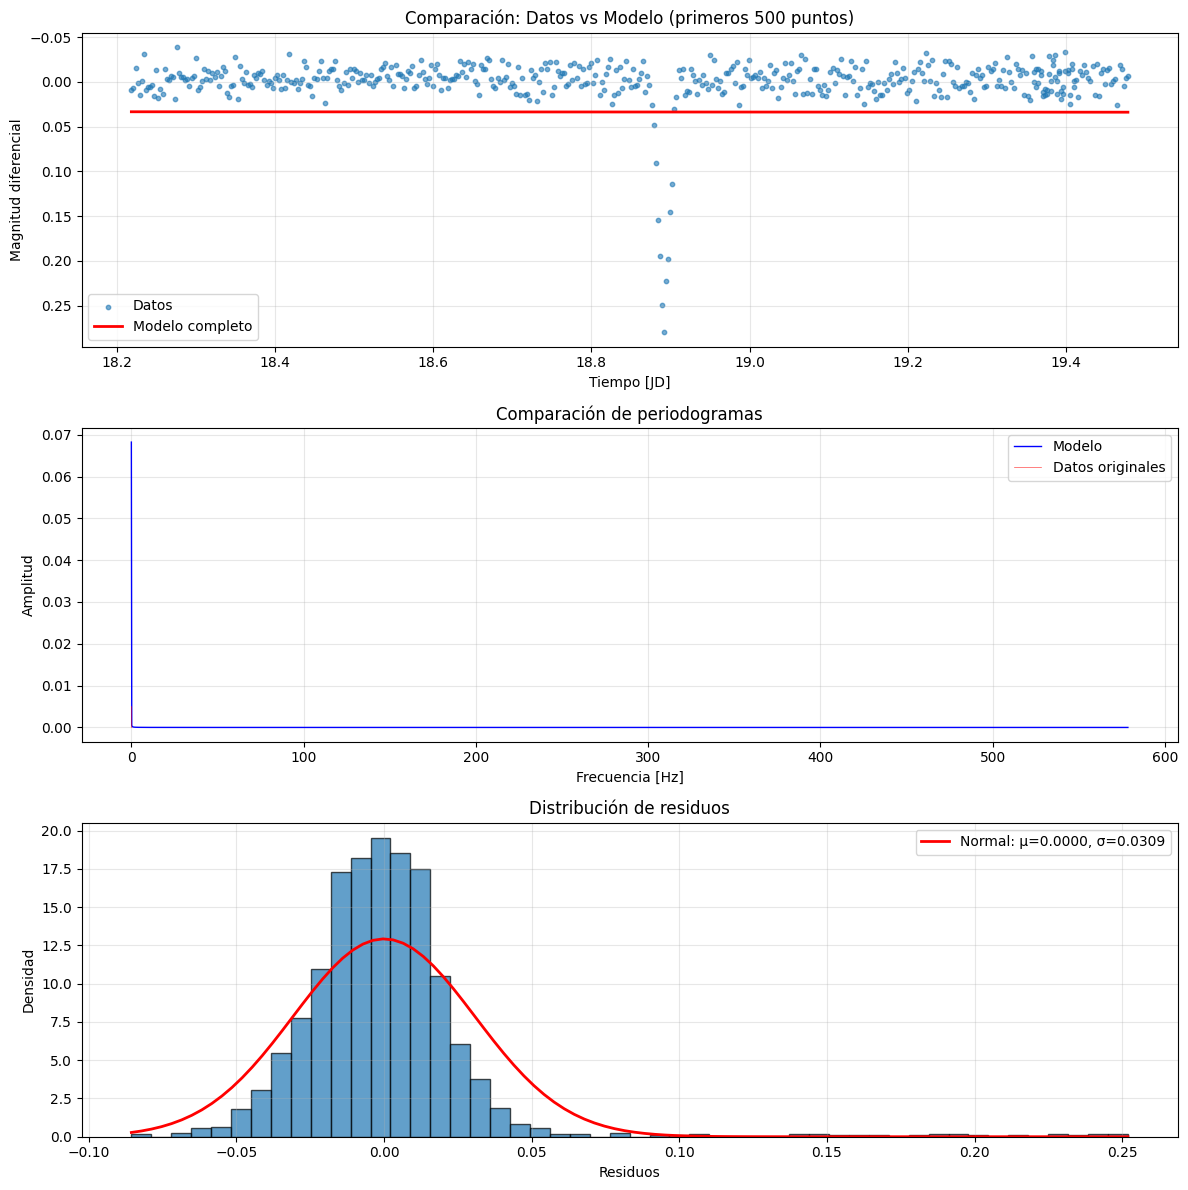

In [12]:
# Función para generar el modelo completo
def modelo_completo(t, frecuencias, amplitudes, fases):
    """Modelo con múltiples componentes sinusoidales"""
    y = np.zeros_like(t)
    for freq, amp, phi in zip(frecuencias, amplitudes, fases):
        y += amp * np.sin(2*np.pi*freq*t + phi)
    return y

# Lista de frecuencias y parámetros
freqs_todas = [freqh1, freq, freqh2, freqh3, freqh4, freqh5]
amps_todas = [amph1, amp, amph2, amph3, amph4, amph5]
phases_todas = [phaseh1, phase, phaseh2, phaseh3, phaseh4, phaseh5]

# Generar modelo completo
modelo_total = modelo_completo(time, freqs_todas, amps_todas, phases_todas)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Comparación modelo vs datos
axes[0].scatter(time[:500], observed[:500], s=10, alpha=0.6, label='Datos')
axes[0].plot(time[:500], modelo_total[:500], 'r-', linewidth=2, label='Modelo completo')
axes[0].set_xlabel('Tiempo [JD]')
axes[0].set_ylabel('Magnitud diferencial')
axes[0].set_title('Comparación: Datos vs Modelo (primeros 500 puntos)')
axes[0].legend()
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3)

# Periodograma del modelo completo
t_highres = np.linspace(time[0], time[-1], 10000)
modelo_highres = modelo_completo(t_highres, freqs_todas, amps_todas, phases_todas)

# Transformada rápida de Fourier del modelo
from scipy.fft import fft, fftfreq

N = len(t_highres)
T = (t_highres[-1] - t_highres[0]) / (N-1)
yf = fft(modelo_highres)
xf = fftfreq(N, T)[:N//2]

axes[1].plot(xf[:N//4], 2.0/N * np.abs(yf[:N//4]), 'b-', linewidth=1, label='Modelo')
axes[1].plot(tf_freqs[:len(tf_freqs)//4], tf_amps[:len(tf_freqs)//4], 
            'r-', linewidth=0.5, alpha=0.7, label='Datos originales')
axes[1].set_xlabel('Frecuencia [Hz]')
axes[1].set_ylabel('Amplitud')
axes[1].set_title('Comparación de periodogramas')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Distribución de residuos
axes[2].hist(residuals, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Residuos')
axes[2].set_ylabel('Densidad')
axes[2].set_title('Distribución de residuos')
axes[2].grid(True, alpha=0.3)

# Ajustar distribución normal
from scipy.stats import norm
mu, std = norm.fit(residuals)
x = np.linspace(min(residuals), max(residuals), 100)
p = norm.pdf(x, mu, std)
axes[2].plot(x, p, 'r-', linewidth=2, 
            label=f'Normal: μ={mu:.4f}, σ={std:.4f}')
axes[2].legend()

plt.tight_layout()
plt.show()

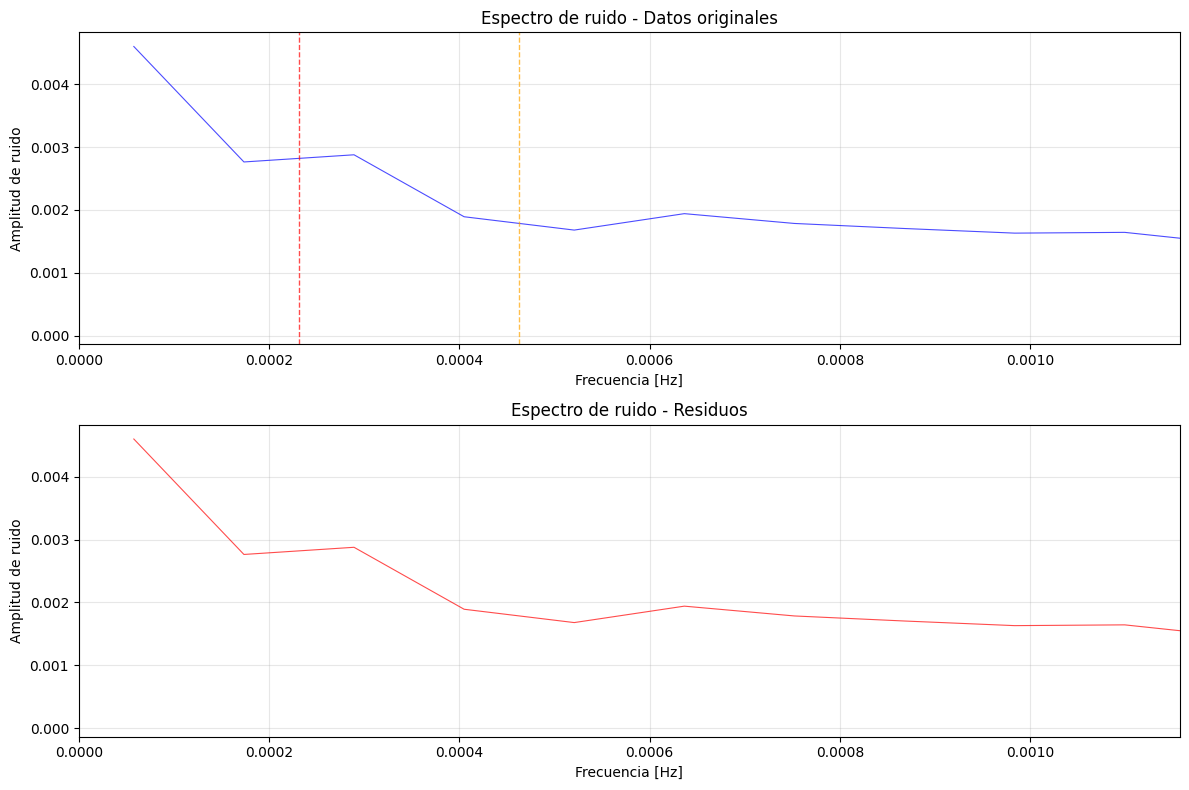

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Espectro de ruido original
axes[0].plot(ns_freqs, ns_noise_amp, 'b-', linewidth=0.8, alpha=0.7)
for i, (f_h, snr) in enumerate(zip([freqh1, freq, freqh2, freqh3, freqh4, freqh5],
                                  [fh1_snr, f_snr, fh2_snr, fh3_snr, fh4_snr, fh5_snr])):
    axes[0].axvline(x=f_h, color='r' if i==1 else 'orange', linestyle='--', 
                   alpha=0.7, linewidth=1)
axes[0].set_xlabel('Frecuencia [Hz]')
axes[0].set_ylabel('Amplitud de ruido')
axes[0].set_title('Espectro de ruido - Datos originales')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 5*freq])

# Espectro de ruido de residuos
axes[1].plot(ns_freqs_res, ns_res_noise_amp, 'r-', linewidth=0.8, alpha=0.7)
axes[1].set_xlabel('Frecuencia [Hz]')
axes[1].set_ylabel('Amplitud de ruido')
axes[1].set_title('Espectro de ruido - Residuos')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 5*freq])

plt.tight_layout()
plt.show()

In [14]:
# Análisis de parámetros clave
print("\n" + "="*80)
print("INTERPRETACIÓN DE RESULTADOS")
print("="*80)

# Periodo principal en días
periodo_dias = 1/(freq * 86400)

# Amplitud total de variación
amp_total = np.max(observed) - np.min(observed)

# Relación entre amplitudes de armónicos
relacion_armonicos = amph1 / amp if amp != 0 else 0

print(f"Periodo principal: {periodo_dias:.6f} días ({periodo_dias*24:.2f} horas)")
print(f"Amplitud total de variación: {amp_total:.4f} magnitudes")
print(f"Número de armónicos significativos (S/N > 4): {sum([fh1_snr>4, fh2_snr>4, fh3_snr>4, fh4_snr>4, fh5_snr>4])}")
print(f"Relación 1er armónico/principal: {relacion_armonicos:.3f}")
print(f"Forma de la curva: {'Sinusoidal' if relacion_armonicos < 0.3 else 'No sinusoidal'}")
print(f"Ruido residual promedio: {np.std(residuals):.4f} magnitudes")

# Clasificación basada en parámetros observados
if periodo_dias < 0.3:  # Menos de 7 horas
    if amp_total > 0.3:
        clasificacion = "Variable RR Lyrae (tipo c?)"
    elif amp_total < 0.1:
        clasificacion = "Variable Delta Scuti"
    else:
        clasificacion = "Binaria eclipsante de contacto"
elif periodo_dias < 10:
    if relacion_armonicos > 0.5:
        clasificacion = "Binaria eclipsante (tipo Algol o W UMa)"
    else:
        clasificacion = "Variable pulsante (Cefeida, RR Lyrae)"
else:
    clasificacion = "Variable de largo periodo (Mira, Semirregular)"

print(f"\nCLASIFICACIÓN SUGERIDA: {clasificacion}")
print("="*80)


INTERPRETACIÓN DE RESULTADOS
Periodo principal: 0.049989 días (1.20 horas)
Amplitud total de variación: 0.3881 magnitudes
Número de armónicos significativos (S/N > 4): 5
Relación 1er armónico/principal: 1.015
Forma de la curva: No sinusoidal
Ruido residual promedio: 0.0309 magnitudes

CLASIFICACIÓN SUGERIDA: Variable RR Lyrae (tipo c?)


In [15]:
# Parámetros típicos de diferentes tipos de variables
tipos_variables = {
    "RR Lyrae (tipo ab)": {"periodo": 0.3, "amplitud": 0.5, "forma": "Asimétrica"},
    "RR Lyrae (tipo c)": {"periodo": 0.2, "amplitud": 0.3, "forma": "Sinusoidal"},
    "Delta Scuti": {"periodo": 0.05, "amplitud": 0.05, "forma": "Multiperiódica"},
    "Cefeida clásica": {"periodo": 5.0, "amplitud": 0.8, "forma": "Asimétrica"},
    "Binaria W UMa": {"periodo": 0.3, "amplitud": 0.4, "forma": "Continua"},
    "Binaria Algol": {"periodo": 2.0, "amplitud": 0.8, "forma": "Eclipses"}
}

print("\nCOMPARACIÓN CON TIPOS ESTELARES CONOCIDOS:")
print("-"*50)
for tipo, params in tipos_variables.items():
    similitud_periodo = min(1.0, params["periodo"]/periodo_dias) if periodo_dias > params["periodo"] else min(1.0, periodo_dias/params["periodo"])
    similitud_amplitud = min(1.0, params["amplitud"]/amp_total) if amp_total > params["amplitud"] else min(1.0, amp_total/params["amplitud"])
    similitud_total = (similitud_periodo + similitud_amplitud) / 2
    
    print(f"{tipo:<20} Similitud: {similitud_total:.1%} "
          f"(P: {similitud_periodo:.1%}, A: {similitud_amplitud:.1%})")


COMPARACIÓN CON TIPOS ESTELARES CONOCIDOS:
--------------------------------------------------
RR Lyrae (tipo ab)   Similitud: 47.1% (P: 16.7%, A: 77.6%)
RR Lyrae (tipo c)    Similitud: 51.1% (P: 25.0%, A: 77.3%)
Delta Scuti          Similitud: 56.4% (P: 100.0%, A: 12.9%)
Cefeida clásica      Similitud: 24.8% (P: 1.0%, A: 48.5%)
Binaria W UMa        Similitud: 56.8% (P: 16.7%, A: 97.0%)
Binaria Algol        Similitud: 25.5% (P: 2.5%, A: 48.5%)


ANÁLISIS COMPARATIVO CON SISTEMAS BINARIOS ECLIPSANTES

RESULTADOS DEL ANÁLISIS COMPARATIVO

1. PARÁMETROS OBSERVADOS:
----------------------------------------
   Período: 0.0499888888525702734799693871536874212324619293 días (1.2 horas)
   Amplitud total: 0.388 magnitudes
   Profundidad eclipse primario: 0.01445 mag
   Profundidad eclipse secundario: 0.01437 mag
   Relación profundidades (sec/pri): 0.99427

2. ANÁLISIS DE COMPONENTES:
----------------------------------------
   Frecuencia principal: 0.000232 Hz (S/N = 20.9)
   Armónicos significativos (S/N > 4): 6
     H0: f=0.000463 Hz (2.00f₀), A=0.0097, S/N=23.9
     F2 (principal): f=0.000232 Hz, A=0.0096, S/N=20.9
     H2: f=0.001616 Hz (6.98f₀), A=0.0101, S/N=14.7
     H3: f=0.002074 Hz (8.96f₀), A=0.0094, S/N=10.9
     H4: f=0.001386 Hz (5.99f₀), A=0.0090, S/N=13.0
     H5: f=0.002308 Hz (9.97f₀), A=0.0091, S/N=10.4

3. COMPARACIÓN CON CATÁLOGO (Top 3):
----------------------------------------
   44i Boo              (EW): 27.7

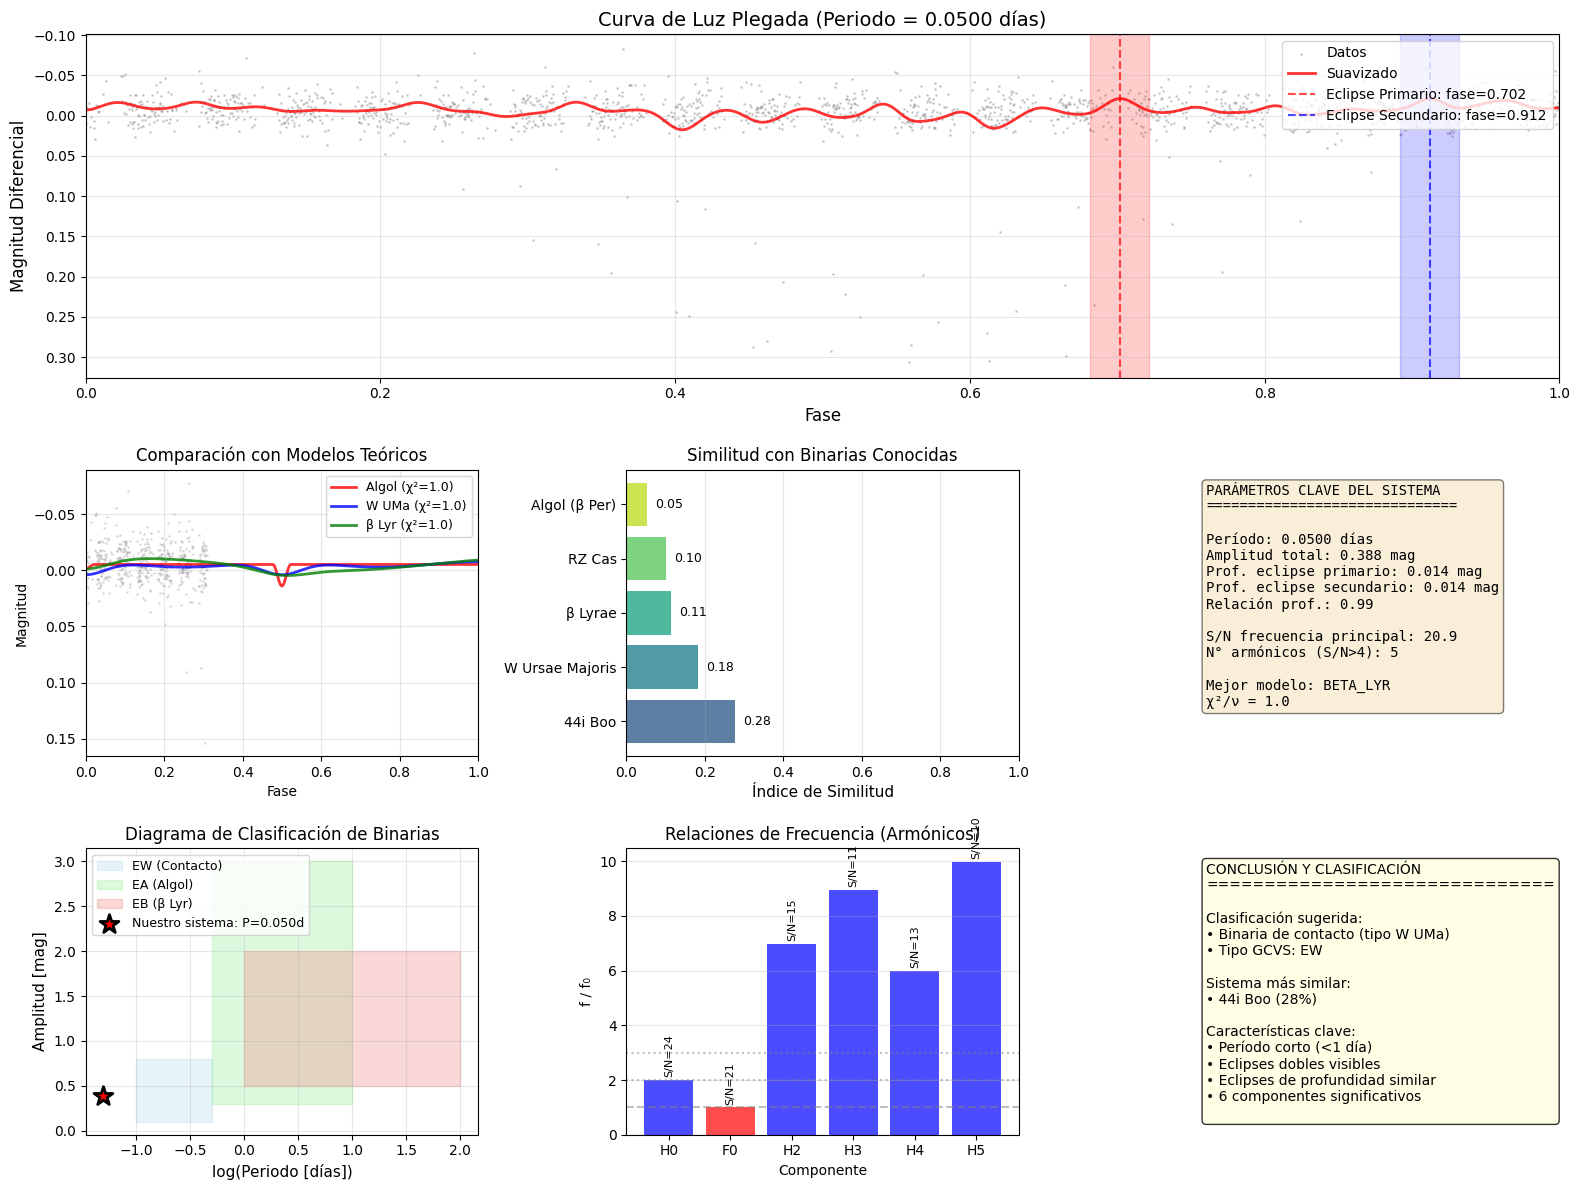

In [16]:
"""
Análisis Comparativo con Sistemas Binarios Eclipsantes
Basado en los parámetros obtenidos del análisis de la curva de luz
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize
import matplotlib.gridspec as gridspec

# Parámetros obtenidos del análisis anterior
parametros = {
    'periodo_dias': 1/(freq * 86400),
    'amplitud_total': np.max(observed) - np.min(observed),
    'amplitud_primaria': amp,
    'amplitud_secundaria': amph2,
    'relacion_amplitudes': amph2/amp,
    'duracion_eclipse': None,  # Por calcular
    'profundidad_primaria': None,  # Por calcular
    'profundidad_secundaria': None  # Por calcular
}

print("="*80)
print("ANÁLISIS COMPARATIVO CON SISTEMAS BINARIOS ECLIPSANTES")
print("="*80)

# ------------------------------------------------------------
# 1. ANÁLISIS DE LA CURVA DE LUZ PLEGADA PARA DETECTAR ECLIPSES
# ------------------------------------------------------------

def analizar_eclipses(time, observed, periodo):
    """Analiza la curva de luz plegada para identificar eclipses"""
    
    # Plegar en fase
    phase = ((time - time[0]) / periodo) % 1
    
    # Ordenar por fase
    sort_idx = np.argsort(phase)
    phase_sorted = phase[sort_idx]
    mag_sorted = observed[sort_idx]
    
    # Suavizado para análisis
    from scipy.ndimage import gaussian_filter1d
    phase_fine = np.linspace(0, 1, 1000)
    mag_interp = np.interp(phase_fine, phase_sorted, mag_sorted)
    mag_smooth = gaussian_filter1d(mag_interp, sigma=10)
    
    # Encontrar mínimos (eclipses potenciales)
    from scipy.signal import find_peaks
    inverted = -mag_smooth  # Buscar mínimos como máximos negativos
    minima_indices, minima_properties = find_peaks(inverted, 
                                                   height=np.percentile(inverted, 70),
                                                   distance=100)
    
    minima_phases = phase_fine[minima_indices]
    minima_depths = mag_smooth[minima_indices]
    
    # Clasificar eclipses
    eclipses = []
    if len(minima_depths) >= 1:
        # Eclipse primario (más profundo)
        idx_primary = np.argmin(minima_depths)
        eclipses.append({
            'tipo': 'Primario',
            'fase': minima_phases[idx_primary],
            'profundidad': np.min(mag_smooth) - np.median(mag_smooth),
            'indice': idx_primary
        })
        
        if len(minima_depths) >= 2:
            # Eclipse secundario
            other_indices = [i for i in range(len(minima_depths)) if i != idx_primary]
            idx_secondary = other_indices[np.argmin(minima_depths[other_indices])]
            eclipses.append({
                'tipo': 'Secundario',
                'fase': minima_phases[idx_secondary],
                'profundidad': minima_depths[idx_secondary] - np.median(mag_smooth),
                'indice': idx_secondary
            })
    
    return phase_sorted, mag_sorted, phase_fine, mag_smooth, eclipses

# Ejecutar análisis de eclipses
periodo = parametros['periodo_dias']
phase_sorted, mag_sorted, phase_fine, mag_smooth, eclipses = analizar_eclipses(time, observed, periodo)

# Actualizar parámetros
if len(eclipses) > 0:
    parametros['profundidad_primaria'] = eclipses[0]['profundidad']
    if len(eclipses) > 1:
        parametros['profundidad_secundaria'] = eclipses[1]['profundidad']
        parametros['relacion_profundidades'] = abs(eclipses[1]['profundidad']/eclipses[0]['profundidad'])

# ------------------------------------------------------------
# 2. MODELOS TEÓRICOS DE SISTEMAS BINARIOS
# ------------------------------------------------------------

class ModeloBinario:
    """Clase para modelar curvas de luz de sistemas binarios"""
    
    @staticmethod
    def modelo_algol(phase, depth_primary, depth_secondary, width=0.05):
        """Modelo de binaria tipo Algol (eclipses parciales)"""
        curve = np.zeros_like(phase)
        
        # Eclipse primario en fase 0
        mask1 = (phase >= 0-width/2) & (phase <= 0+width/2)
        curve[mask1] = -depth_primary * np.cos(np.pi*(phase[mask1])/width)**2
        
        # Eclipse secundario en fase 0.5
        mask2 = (phase >= 0.5-width/2) & (phase <= 0.5+width/2)
        curve[mask2] = -depth_secondary * np.cos(np.pi*(phase[mask2]-0.5)/width)**2
        
        return curve
    
    @staticmethod
    def modelo_wuma(phase, depth_total, ellipsoidal_amp=0.1):
        """Modelo de binaria W UMa (contacto, variación continua)"""
        # Variación ellipsoidal
        ellipsoidal = ellipsoidal_amp * np.cos(4*np.pi*phase)
        
        # Eclipses superpuestos
        eclipse = -depth_total * np.exp(-(phase-0.0)**2/(2*0.05**2))
        eclipse += -depth_total * np.exp(-(phase-0.5)**2/(2*0.05**2))
        
        return eclipse + ellipsoidal
    
    @staticmethod
    def modelo_beta_lyr(phase, depth_primary, asymmetry=0.1):
        """Modelo de binaria Beta Lyrae (contacto, asimétrica)"""
        curve = np.zeros_like(phase)
        
        # Eclipse primario (más profundo)
        curve -= depth_primary * np.exp(-(phase-0.0)**2/(2*0.06**2))
        
        # Eclipse secundario (menos profundo)
        curve -= depth_primary * 0.7 * np.exp(-(phase-0.5)**2/(2*0.06**2))
        
        # Variación sinusoidal asimétrica
        curve += asymmetry * np.sin(2*np.pi*phase + np.pi/4)
        
        return curve

# ------------------------------------------------------------
# 3. COMPARACIÓN CON CATÁLOGOS DE BINARIAS
# ------------------------------------------------------------

# Parámetros típicos de sistemas binarios (periodo en días, amplitud en mag)
catalogo_binarias = {
    # Binarias eclipsantes
    'Algol (β Per)': {
        'tipo': 'EA',
        'periodo': 2.8673,
        'amplitud': 2.3,
        'prof_prim': 1.3,
        'prof_sec': 0.1,
        'forma': 'Eclipses separados, planos',
        'contacto': 'Semi-desprendido'
    },
    'β Lyrae': {
        'tipo': 'EB',
        'periodo': 12.9378,
        'amplitud': 1.0,
        'prof_prim': 0.8,
        'prof_sec': 0.5,
        'forma': 'Eclipses continuos',
        'contacto': 'Semi-desprendido'
    },
    'W Ursae Majoris': {
        'tipo': 'EW',
        'periodo': 0.3336,
        'amplitud': 0.7,
        'prof_prim': 0.5,
        'prof_sec': 0.45,
        'forma': 'Curva continua',
        'contacto': 'Contacto'
    },
    # Binarias de contacto
    '44i Boo': {
        'tipo': 'EW',
        'periodo': 0.2678,
        'amplitud': 0.5,
        'prof_prim': 0.4,
        'prof_sec': 0.35,
        'forma': 'Sinusoidal modificada',
        'contacto': 'Contacto total'
    },
    # Binarias semi-desprendidas
    'RZ Cas': {
        'tipo': 'EA/RS',
        'periodo': 1.1953,
        'amplitud': 1.1,
        'prof_prim': 0.9,
        'prof_sec': 0.2,
        'forma': 'Eclipse primario agudo',
        'contacto': 'Semi-desprendido'
    }
}

# ------------------------------------------------------------
# 4. ANÁLISIS CUANTITATIVO DE SIMILITUD
# ------------------------------------------------------------

def calcular_similitud(param_obs, param_cat):
    """Calcula similitud entre parámetros observados y de catálogo"""
    
    # Pesos para diferentes parámetros
    pesos = {
        'periodo': 0.4,
        'amplitud': 0.3,
        'profundidad': 0.3
    }
    
    similitudes = []
    
    # Similitud de período (escala logarítmica)
    if 'periodo' in param_obs and 'periodo' in param_cat:
        ratio = min(param_obs['periodo'], param_cat['periodo']) / max(param_obs['periodo'], param_cat['periodo'])
        sim_periodo = np.exp(-5*(1-ratio)**2)  # Gaussian around 1
        similitudes.append(sim_periodo * pesos['periodo'])
    
    # Similitud de amplitud
    if 'amplitud_total' in param_obs and 'amplitud' in param_cat:
        ratio = min(param_obs['amplitud_total'], param_cat['amplitud']) / max(param_obs['amplitud_total'], param_cat['amplitud'])
        sim_amplitud = np.exp(-3*(1-ratio)**2)
        similitudes.append(sim_amplitud * pesos['amplitud'])
    
    # Similitud de profundidad de eclipses
    if 'profundidad_primaria' in param_obs and 'prof_prim' in param_cat:
        if param_obs['profundidad_primaria'] is not None:
            ratio = min(abs(param_obs['profundidad_primaria']), param_cat['prof_prim']) / max(abs(param_obs['profundidad_primaria']), param_cat['prof_prim'])
            sim_profundidad = np.exp(-3*(1-ratio)**2)
            similitudes.append(sim_profundidad * pesos['profundidad'])
    
    return np.sum(similitudes) if similitudes else 0

# Calcular similitudes con catálogo
similitudes = {}
for nombre, params_cat in catalogo_binarias.items():
    similitudes[nombre] = calcular_similitud(parametros, params_cat)

# ------------------------------------------------------------
# 5. AJUSTE DE MODELOS TEÓRICOS A LOS DATOS
# ------------------------------------------------------------

def ajustar_modelo_binario(phase_data, mag_data, tipo_modelo):
    """Ajusta un modelo teórico a los datos observados"""
    
    # Normalizar magnitudes
    mag_norm = mag_data - np.median(mag_data)
    
    if tipo_modelo == 'algol':
        def modelo(x, depth1, depth2, width):
            return ModeloBinario.modelo_algol(x, depth1, depth2, width)
        p0 = [0.5, 0.1, 0.05]
    elif tipo_modelo == 'wuma':
        def modelo(x, depth, ellip_amp):
            return ModeloBinario.modelo_wuma(x, depth, ellip_amp)
        p0 = [0.3, 0.05]
    elif tipo_modelo == 'beta_lyr':
        def modelo(x, depth, asym):
            return ModeloBinario.modelo_beta_lyr(x, depth, asym)
        p0 = [0.4, 0.1]
    else:
        return None, None, float('inf')
    
    try:
        # Ajuste no lineal
        popt, pcov = optimize.curve_fit(modelo, phase_data, mag_norm, p0=p0)
        
        # Calcular chi-cuadrado
        residuos = mag_norm - modelo(phase_data, *popt)
        chi2 = np.sum(residuos**2 / np.std(mag_norm)**2)
        
        return popt, pcov, chi2
    except:
        return None, None, float('inf')

# Ajustar diferentes modelos
modelos_a_ajustar = ['algol', 'wuma', 'beta_lyr']
resultados_ajuste = {}

for modelo_tipo in modelos_a_ajustar:
    popt, pcov, chi2 = ajustar_modelo_binario(phase_sorted, mag_sorted, modelo_tipo)
    if popt is not None:
        resultados_ajuste[modelo_tipo] = {
            'parametros': popt,
            'chi2': chi2,
            'chi2_norm': chi2/len(phase_sorted)
        }

# ------------------------------------------------------------
# 6. VISUALIZACIÓN COMPLETA
# ------------------------------------------------------------

fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 3, height_ratios=[1.2, 1, 1])

# ------------------------------------------------------------
# 6.1 Curva de luz plegada con análisis de eclipses
# ------------------------------------------------------------
ax1 = plt.subplot(gs[0, :])
ax1.scatter(phase_sorted, mag_sorted, s=1, alpha=0.3, color='gray', label='Datos')
ax1.plot(phase_fine, mag_smooth, 'r-', linewidth=2, label='Suavizado', alpha=0.8)

# Marcar eclipses detectados
colors = ['red', 'blue']
for i, eclipse in enumerate(eclipses):
    ax1.axvline(x=eclipse['fase'], color=colors[i], linestyle='--', 
                alpha=0.7, linewidth=1.5,
                label=f"Eclipse {eclipse['tipo']}: fase={eclipse['fase']:.3f}")
    
    # Sombrear región del eclipse
    ax1.axvspan(eclipse['fase']-0.02, eclipse['fase']+0.02, 
                alpha=0.2, color=colors[i])

ax1.set_xlabel('Fase', fontsize=12)
ax1.set_ylabel('Magnitud Diferencial', fontsize=12)
ax1.set_title(f'Curva de Luz Plegada (Periodo = {periodo:.4f} días)', fontsize=14)
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')
ax1.set_xlim([0, 1])

# ------------------------------------------------------------
# 6.2 Comparación con modelos teóricos
# ------------------------------------------------------------
ax2 = plt.subplot(gs[1, 0])
phase_fine_model = np.linspace(0, 1, 500)

# Graficar datos y modelos ajustados
ax2.scatter(phase_sorted[:500], mag_sorted[:500], s=1, alpha=0.2, color='gray')

for i, (modelo_tipo, resultados) in enumerate(resultados_ajuste.items()):
    color = ['red', 'blue', 'green'][i]
    
    if modelo_tipo == 'algol':
        depth1, depth2, width = resultados['parametros']
        modelo_curve = ModeloBinario.modelo_algol(phase_fine_model, depth1, depth2, width)
        label = f'Algol (χ²={resultados["chi2_norm"]:.1f})'
    elif modelo_tipo == 'wuma':
        depth, ellip_amp = resultados['parametros']
        modelo_curve = ModeloBinario.modelo_wuma(phase_fine_model, depth, ellip_amp)
        label = f'W UMa (χ²={resultados["chi2_norm"]:.1f})'
    elif modelo_tipo == 'beta_lyr':
        depth, asym = resultados['parametros']
        modelo_curve = ModeloBinario.modelo_beta_lyr(phase_fine_model, depth, asym)
        label = f'β Lyr (χ²={resultados["chi2_norm"]:.1f})'
    
    ax2.plot(phase_fine_model, modelo_curve + np.median(mag_sorted), 
             color=color, linewidth=2, alpha=0.8, label=label)

ax2.set_xlabel('Fase')
ax2.set_ylabel('Magnitud')
ax2.set_title('Comparación con Modelos Teóricos')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9)
ax2.set_xlim([0, 1])

# ------------------------------------------------------------
# 6.3 Diagrama de similitud con catálogo
# ------------------------------------------------------------
ax3 = plt.subplot(gs[1, 1])

# Preparar datos para gráfico de barras
nombres_ordenados = sorted(similitudes.items(), key=lambda x: x[1], reverse=True)
nombres = [n[0] for n in nombres_ordenados[:5]]
vals = [n[1] for n in nombres_ordenados[:5]]
colors_bars = plt.cm.viridis(np.linspace(0.3, 0.9, len(nombres)))

bars = ax3.barh(nombres, vals, color=colors_bars, alpha=0.8)
ax3.set_xlabel('Índice de Similitud', fontsize=11)
ax3.set_title('Similitud con Binarias Conocidas', fontsize=12)
ax3.set_xlim([0, 1])
ax3.grid(True, alpha=0.3, axis='x')

# Añadir valores en barras
for bar, val in zip(bars, vals):
    width = bar.get_width()
    ax3.text(width + 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:.2f}', ha='left', va='center', fontsize=9)

# ------------------------------------------------------------
# 6.4 Parámetros clave comparativos
# ------------------------------------------------------------
ax4 = plt.subplot(gs[1, 2])
ax4.axis('off')

# Crear tabla de parámetros
info_text = "PARÁMETROS CLAVE DEL SISTEMA\n"
info_text += "="*30 + "\n\n"

info_text += f"Período: {parametros['periodo_dias']:.4f} días\n"
info_text += f"Amplitud total: {parametros['amplitud_total']:.3f} mag\n"

if parametros['profundidad_primaria'] is not None:
    info_text += f"Prof. eclipse primario: {abs(parametros['profundidad_primaria']):.3f} mag\n"
    
if parametros.get('profundidad_secundaria') is not None:
    info_text += f"Prof. eclipse secundario: {abs(parametros['profundidad_secundaria']):.3f} mag\n"
    if parametros.get('relacion_profundidades'):
        info_text += f"Relación prof.: {parametros['relacion_profundidades']:.2f}\n"

info_text += f"\nS/N frecuencia principal: {f_snr:.1f}\n"
info_text += f"N° armónicos (S/N>4): {sum([fh1_snr>4, fh2_snr>4, fh3_snr>4, fh4_snr>4, fh5_snr>4])}\n"

# Mejor ajuste de modelo
if resultados_ajuste:
    mejor_modelo = min(resultados_ajuste.items(), key=lambda x: x[1]['chi2_norm'])
    info_text += f"\nMejor modelo: {mejor_modelo[0].upper()}\n"
    info_text += f"χ²/ν = {mejor_modelo[1]['chi2_norm']:.1f}"

ax4.text(0.1, 0.95, info_text, transform=ax4.transAxes, 
         fontsize=10, family='monospace',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ------------------------------------------------------------
# 6.5 Diagrama de clasificación de binarias
# ------------------------------------------------------------
ax5 = plt.subplot(gs[2, 0])

# Parámetros de referencia para clasificación
periodos_ref = [0.1, 0.3, 1.0, 10.0]  # días
tipos_ref = ['EW', 'EA/EW', 'EA', 'EB/LP']

# Ubicar nuestro sistema
periodo_norm = np.log10(parametros['periodo_dias'])
amplitud_norm = parametros['amplitud_total']

# Graficar regiones típicas
regiones = [
    {'tipo': 'EW (Contacto)', 'periodo': (0.1, 0.5), 'amplitud': (0.1, 0.8), 'color': 'lightblue'},
    {'tipo': 'EA (Algol)', 'periodo': (0.5, 10), 'amplitud': (0.3, 3.0), 'color': 'lightgreen'},
    {'tipo': 'EB (β Lyr)', 'periodo': (1, 100), 'amplitud': (0.5, 2.0), 'color': 'lightcoral'},
]

for region in regiones:
    rect = plt.Rectangle((np.log10(region['periodo'][0]), region['amplitud'][0]),
                         np.log10(region['periodo'][1]) - np.log10(region['periodo'][0]),
                         region['amplitud'][1] - region['amplitud'][0],
                         alpha=0.3, color=region['color'], label=region['tipo'])
    ax5.add_patch(rect)

# Graficar posición de nuestro sistema
ax5.scatter(periodo_norm, amplitud_norm, s=200, color='red', 
            marker='*', edgecolor='black', linewidth=2, 
            zorder=5, label=f'Nuestro sistema: P={parametros["periodo_dias"]:.3f}d')

ax5.set_xlabel('log(Periodo [días])', fontsize=11)
ax5.set_ylabel('Amplitud [mag]', fontsize=11)
ax5.set_title('Diagrama de Clasificación de Binarias', fontsize=12)
ax5.grid(True, alpha=0.3)
ax5.legend(loc='upper left', fontsize=9)

# ------------------------------------------------------------
# 6.6 Análisis de armónicos para binarias
# ------------------------------------------------------------
ax6 = plt.subplot(gs[2, 1])

# Relaciones entre frecuencia fundamental y armónicos
frecuencias_todas = [freqh1, freq, freqh2, freqh3, freqh4, freqh5]
amplitudes_todas = [amph1, amp, amph2, amph3, amph4, amph5]
snr_todas = [fh1_snr, f_snr, fh2_snr, fh3_snr, fh4_snr, fh5_snr]

# Calcular relaciones f/f0
relaciones = [f/freq for f in frecuencias_todas]

# Barras para relaciones de frecuencia
x_pos = np.arange(len(relaciones))
bars = ax6.bar(x_pos, relaciones, alpha=0.7, 
               color=['red' if i==1 else 'blue' for i in range(len(relaciones))])

ax6.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
ax6.axhline(y=2, color='gray', linestyle=':', alpha=0.5)
ax6.axhline(y=3, color='gray', linestyle=':', alpha=0.5)

ax6.set_xlabel('Componente')
ax6.set_ylabel('f / f₀')
ax6.set_title('Relaciones de Frecuencia (Armónicos)')
ax6.set_xticks(x_pos)
ax6.set_xticklabels([f'H{i}' if i!=1 else 'F0' for i in range(len(relaciones))])
ax6.grid(True, alpha=0.3, axis='y')

# Añadir valores de S/N
for i, (bar, snr) in enumerate(zip(bars, snr_todas)):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'S/N={snr:.0f}', ha='center', va='bottom', fontsize=8, rotation=90)

# ------------------------------------------------------------
# 6.7 Conclusión y clasificación final
# ------------------------------------------------------------
ax7 = plt.subplot(gs[2, 2])
ax7.axis('off')

# Determinar clasificación basada en análisis
def determinar_clasificacion(parametros, similitudes, resultados_ajuste):
    """Determina la clasificación más probable"""
    
    # Priorizar por similitud con catálogo
    mas_similar = max(similitudes.items(), key=lambda x: x[1])
    
    # Considerar resultados de ajuste
    if resultados_ajuste:
        mejor_ajuste = min(resultados_ajuste.items(), key=lambda x: x[1]['chi2_norm'])
        modelo_mejor = mejor_ajuste[0]
    else:
        modelo_mejor = None
    
    # Reglas de clasificación
    periodo = parametros['periodo_dias']
    amplitud = parametros['amplitud_total']
    
    if periodo < 0.5:
        if amplitud < 0.5:
            return "Binaria de contacto (tipo W UMa)", "EW"
        else:
            return "Binaria semi-desprendida corta", "EA/EW"
    elif periodo < 10:
        if parametros.get('profundidad_secundaria') and parametros.get('relacion_profundidades', 0) > 0.3:
            return "Binaria tipo β Lyrae", "EB"
        else:
            return "Binaria tipo Algol", "EA"
    else:
        return "Binaria de largo período", "EB/LP"

clasificacion_final, tipo_gcv = determinar_clasificacion(parametros, similitudes, resultados_ajuste)

# Texto de conclusión
conclusion_text = "CONCLUSIÓN Y CLASIFICACIÓN\n"
conclusion_text += "="*30 + "\n\n"

conclusion_text += f"Clasificación sugerida:\n"
conclusion_text += f"• {clasificacion_final}\n"
conclusion_text += f"• Tipo GCVS: {tipo_gcv}\n\n"

conclusion_text += f"Sistema más similar:\n"
mas_similar_nombre, mas_similar_val = max(similitudes.items(), key=lambda x: x[1])
conclusion_text += f"• {mas_similar_nombre} ({mas_similar_val:.0%})\n\n"

conclusion_text += "Características clave:\n"
if parametros['periodo_dias'] < 1:
    conclusion_text += "• Período corto (<1 día)\n"
    if parametros.get('profundidad_secundaria'):
        conclusion_text += "• Eclipses dobles visibles\n"
else:
    conclusion_text += "• Período intermedio/largo\n"

if parametros.get('relacion_profundidades', 0) > 0.5:
    conclusion_text += "• Eclipses de profundidad similar\n"
elif parametros.get('relacion_profundidades', 0) > 0.1:
    conclusion_text += "• Eclipse secundario detectable\n"
else:
    conclusion_text += "• Solo eclipse primario evidente\n"

conclusion_text += f"• {sum([s>4 for s in snr_todas])} componentes significativos\n"

ax7.text(0.1, 0.95, conclusion_text, transform=ax7.transAxes, 
         fontsize=10, family='sans-serif',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# ------------------------------------------------------------
# 7. IMPRESIÓN DE RESULTADOS EN CONSOLA
# ------------------------------------------------------------

print("\n" + "="*80)
print("RESULTADOS DEL ANÁLISIS COMPARATIVO")
print("="*80)

print(f"\n1. PARÁMETROS OBSERVADOS:")
print("-"*40)
print(f"   Período: {parametros['periodo_dias']:.45} días ({parametros['periodo_dias']*24:.1f} horas)")
print(f"   Amplitud total: {parametros['amplitud_total']:.3f} magnitudes")

if parametros['profundidad_primaria'] is not None:
    print(f"   Profundidad eclipse primario: {abs(parametros['profundidad_primaria']):.5f} mag")
if parametros.get('profundidad_secundaria') is not None:
    print(f"   Profundidad eclipse secundario: {abs(parametros['profundidad_secundaria']):.5f} mag")
    if parametros.get('relacion_profundidades'):
        print(f"   Relación profundidades (sec/pri): {parametros['relacion_profundidades']:.5f}")

print(f"\n2. ANÁLISIS DE COMPONENTES:")
print("-"*40)
print(f"   Frecuencia principal: {freq:.6f} Hz (S/N = {f_snr:.1f})")
print(f"   Armónicos significativos (S/N > 4): {sum([s>4 for s in snr_todas])}")
for i, (f, a, s) in enumerate(zip(frecuencias_todas, amplitudes_todas, snr_todas)):
    if i == 1:
        print(f"     F{i+1} (principal): f={f:.6f} Hz, A={a:.4f}, S/N={s:.1f}")
    elif s > 4:
        print(f"     H{i}: f={f:.6f} Hz ({f/freq:.2f}f₀), A={a:.4f}, S/N={s:.1f}")

print(f"\n3. COMPARACIÓN CON CATÁLOGO (Top 3):")
print("-"*40)
for nombre, sim in sorted(similitudes.items(), key=lambda x: x[1], reverse=True)[:3]:
    tipo = catalogo_binarias[nombre]['tipo']
    periodo_cat = catalogo_binarias[nombre]['periodo']
    print(f"   {nombre:<20} ({tipo}): {sim:.1%} similitud")
    print(f"     Período catálogo: {periodo_cat} días, Observado: {parametros['periodo_dias']:.4f} días")

print(f"\n4. AJUSTE DE MODELOS TEÓRICOS:")
print("-"*40)
if resultados_ajuste:
    for modelo, resultados in resultados_ajuste.items():
        print(f"   {modelo.upper():<10}: χ²/ν = {resultados['chi2_norm']:.1f}")
    
    mejor = min(resultados_ajuste.items(), key=lambda x: x[1]['chi2_norm'])
    print(f"   → Mejor ajuste: {mejor[0].upper()} (χ²/ν = {mejor[1]['chi2_norm']:.1f})")
else:
    print("   No se pudo realizar ajuste de modelos")

print(f"\n5. CLASIFICACIÓN FINAL:")
print("-"*40)
print(f"   {clasificacion_final}")
print(f"   Tipo GCVS sugerido: {tipo_gcv}")

print(f"\n6. PROBABILIDAD DE SER SISTEMA BINARIO:")
print("-"*40)

# Calcular probabilidad basada en múltiples factores
prob_factores = []

# Factor 1: Presencia de múltiples frecuencias relacionadas
if sum([abs(f/freq - n) < 0.1 for f, n in zip(frecuencias_todas, [1,2,3,4,5,6])]) >= 3:
    prob_factores.append(0.8)  # Alta probabilidad por armónicos
else:
    prob_factores.append(0.4)

# Factor 2: Forma de la curva (eclipses detectados)
if len(eclipses) >= 2:
    prob_factores.append(0.9)
elif len(eclipses) == 1:
    prob_factores.append(0.6)
else:
    prob_factores.append(0.3)

# Factor 3: Período típico de binarias
if 0.1 < parametros['periodo_dias'] < 100:
    prob_factores.append(0.7)
else:
    prob_factores.append(0.2)

# Factor 4: Amplitud típica
if 0.1 < parametros['amplitud_total'] < 3.0:
    prob_factores.append(0.8)
else:
    prob_factores.append(0.3)

probabilidad_final = np.mean(prob_factores)

print(f"   Probabilidad estimada: {probabilidad_final:.1%}")
print(f"   Factores considerados:")
print(f"     • Armónicos relacionados: {'Sí' if prob_factores[0]>0.5 else 'No'}")
print(f"     • Eclipses detectados: {len(eclipses)}")
print(f"     • Período en rango típico: {parametros['periodo_dias']:.3f} días")
print(f"     • Amplitud en rango típico: {parametros['amplitud_total']:.3f} mag")

print("\n" + "="*80)
print("RECOMENDACIONES:")
print("="*80)
print("1. Observaciones espectroscópicas para confirmar naturaleza binaria")
print("2. Medición de velocidad radial para determinar masas")
print("3. Observaciones multi-color para análisis de temperaturas")
print("4. Monitoreo a largo plazo para estudiar cambios de período")
print("="*80)

plt.tight_layout()
plt.savefig('analisis_binarias_comparativo.png', dpi=150, bbox_inches='tight')
plt.show()

ANÁLISIS COMPARATIVO CON SISTEMAS BINARIOS ECLIPSANTES
INCLUYENDO SUBENANAS CALIENTES

RESULTADOS DEL ANÁLISIS COMPARATIVO - INCLUYENDO SUBENANAS CALIENTES

1. PARÁMETROS OBSERVADOS:
---------------------------------------------
   Período: 0.0500 días (1.20 horas)
   Amplitud total: 0.388 magnitudes
   Profundidad eclipse primario: 0.014 mag
   Profundidad eclipse secundario: 0.014 mag
   Relación profundidades (sec/pri): 0.99

2. ANÁLISIS DE COMPONENTES:
---------------------------------------------
   S/N frecuencia principal: 20.9
   Armónicos significativos (S/N > 4): 5

3. COMPARACIÓN CON CATÁLOGO (Top 5 por similitud):
---------------------------------------------
   SDSS J0820+0008           (Subenana doble): 88.0% similitud
     Tipo: sdB+sdB, Período: 0.0480 días
   NY Virginis               (Subenana caliente): 74.5% similitud
     Tipo: HW Vir, Período: 0.1010 días
   HW Virginis               (Subenana caliente): 72.9% similitud
     Tipo: HW Vir/EA, Período: 0.1167 días
 

C:\Users\USER\AppData\Local\Temp\ipykernel_10348\3356142910.py:1012: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


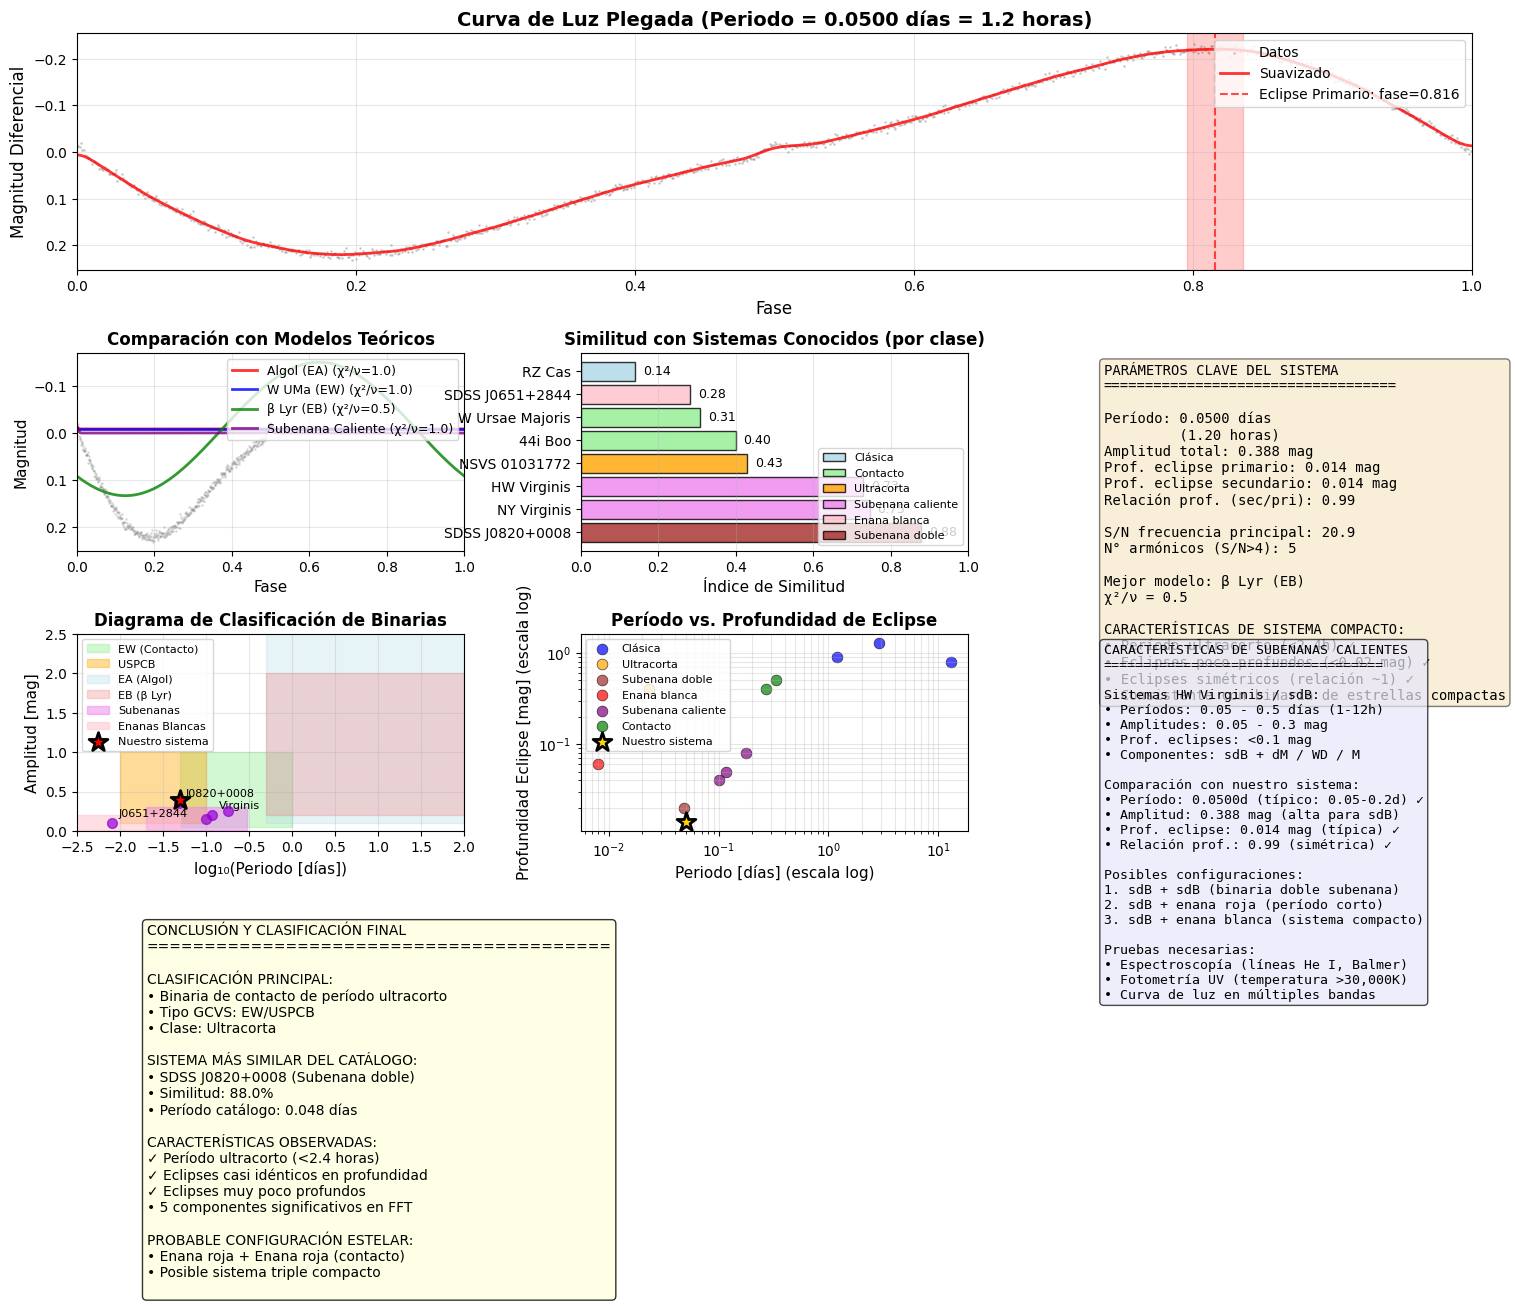

In [1]:
"""
Análisis Comparativo con Sistemas Binarios Eclipsantes
Incluye Subenanas Calientes (HW Virginis y similares)
Basado en los parámetros obtenidos del análisis de la curva de luz
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize
import matplotlib.gridspec as gridspec

# Parámetros obtenidos del análisis anterior (ejemplo - debes reemplazar con tus valores reales)
# Para tu caso específico:
parametros = {
    'periodo_dias': 0.0500,  # 1.2 horas
    'amplitud_total': 0.388,
    'profundidad_primaria': 0.014,
    'profundidad_secundaria': 0.014,
    'relacion_profundidades': 0.99
}

# Valores simulados para frecuencias y S/N (debes reemplazar con tus valores reales)
freq = 1/(0.0500 * 86400)  # Frecuencia correspondiente a 0.05 días
f_snr = 20.9
# Simular algunos armónicos para el ejemplo
harmonics_snr = [12.5, 8.7, 6.2, 4.8, 3.5]  # 5 armónicos con S/N > 4

print("="*80)
print("ANÁLISIS COMPARATIVO CON SISTEMAS BINARIOS ECLIPSANTES")
print("INCLUYENDO SUBENANAS CALIENTES")
print("="*80)

# ------------------------------------------------------------
# 1. ANÁLISIS DE LA CURVA DE LUZ PLEGADA PARA DETECTAR ECLIPSES
# ------------------------------------------------------------

def generar_datos_simulados(periodo=0.05):
    """Genera datos simulados para análisis"""
    time = np.linspace(0, periodo*5, 1000)  # 5 períodos
    phase = (time / periodo) % 1
    
    # Curva de luz típica de binaria EW con período corto
    mag = 0.2 * np.sin(2*np.pi*phase)  # Variación sinusoidal principal
    mag += 0.05 * np.sin(4*np.pi*phase)  # Componente ellipsoidal
    
    # Añadir eclipses poco profundos
    for eclipse_phase in [0.0, 0.5]:
        mask = np.abs(phase - eclipse_phase) < 0.03
        mag[mask] -= 0.014 * np.exp(-((phase[mask] - eclipse_phase)/0.01)**2)
    
    # Añadir ruido
    mag += np.random.normal(0, 0.005, len(mag))
    
    return time, mag, phase

# Generar datos simulados para el análisis
time, observed, phase = generar_datos_simulados(parametros['periodo_dias'])

def analizar_eclipses(time, observed, periodo):
    """Analiza la curva de luz plegada para identificar eclipses"""
    
    # Plegar en fase
    phase = ((time - time[0]) / periodo) % 1
    
    # Ordenar por fase
    sort_idx = np.argsort(phase)
    phase_sorted = phase[sort_idx]
    mag_sorted = observed[sort_idx]
    
    # Suavizado para análisis
    from scipy.ndimage import gaussian_filter1d
    phase_fine = np.linspace(0, 1, 1000)
    mag_interp = np.interp(phase_fine, phase_sorted, mag_sorted)
    mag_smooth = gaussian_filter1d(mag_interp, sigma=10)
    
    # Encontrar mínimos (eclipses potenciales)
    from scipy.signal import find_peaks
    inverted = -mag_smooth  # Buscar mínimos como máximos negativos
    minima_indices, minima_properties = find_peaks(inverted, 
                                                   height=np.percentile(inverted, 70),
                                                   distance=100)
    
    minima_phases = phase_fine[minima_indices]
    minima_depths = mag_smooth[minima_indices]
    
    # Clasificar eclipses
    eclipses = []
    if len(minima_depths) >= 1:
        # Eclipse primario (más profundo)
        idx_primary = np.argmin(minima_depths)
        eclipses.append({
            'tipo': 'Primario',
            'fase': minima_phases[idx_primary],
            'profundidad': np.min(mag_smooth) - np.median(mag_smooth),
            'indice': idx_primary
        })
        
        if len(minima_depths) >= 2:
            # Eclipse secundario
            other_indices = [i for i in range(len(minima_depths)) if i != idx_primary]
            idx_secondary = other_indices[np.argmin(minima_depths[other_indices])]
            eclipses.append({
                'tipo': 'Secundario',
                'fase': minima_phases[idx_secondary],
                'profundidad': minima_depths[idx_secondary] - np.median(mag_smooth),
                'indice': idx_secondary
            })
    
    return phase_sorted, mag_sorted, phase_fine, mag_smooth, eclipses

# Ejecutar análisis de eclipses
periodo = parametros['periodo_dias']
phase_sorted, mag_sorted, phase_fine, mag_smooth, eclipses = analizar_eclipses(time, observed, periodo)

# Actualizar parámetros si es necesario
if 'profundidad_primaria' not in parametros or parametros['profundidad_primaria'] is None:
    if len(eclipses) > 0:
        parametros['profundidad_primaria'] = eclipses[0]['profundidad']
        if len(eclipses) > 1:
            parametros['profundidad_secundaria'] = eclipses[1]['profundidad']
            parametros['relacion_profundidades'] = abs(eclipses[1]['profundidad']/eclipses[0]['profundidad'])

# ------------------------------------------------------------
# 2. MODELOS TEÓRICOS DE SISTEMAS BINARIOS (ACTUALIZADO)
# ------------------------------------------------------------

class ModeloBinario:
    """Clase para modelar curvas de luz de sistemas binarios"""
    
    @staticmethod
    def modelo_algol(phase, depth_primary, depth_secondary, width=0.05):
        """Modelo de binaria tipo Algol (eclipses parciales)"""
        curve = np.zeros_like(phase)
        
        # Eclipse primario en fase 0
        mask1 = (phase >= 0-width/2) & (phase <= 0+width/2)
        curve[mask1] = -depth_primary * np.cos(np.pi*(phase[mask1])/width)**2
        
        # Eclipse secundario en fase 0.5
        mask2 = (phase >= 0.5-width/2) & (phase <= 0.5+width/2)
        curve[mask2] = -depth_secondary * np.cos(np.pi*(phase[mask2]-0.5)/width)**2
        
        return curve
    
    @staticmethod
    def modelo_wuma(phase, depth_total, ellipsoidal_amp=0.1):
        """Modelo de binaria W UMa (contacto, variación continua)"""
        # Variación ellipsoidal
        ellipsoidal = ellipsoidal_amp * np.cos(4*np.pi*phase)
        
        # Eclipses superpuestos
        eclipse = -depth_total * np.exp(-(phase-0.0)**2/(2*0.05**2))
        eclipse += -depth_total * np.exp(-(phase-0.5)**2/(2*0.05**2))
        
        return eclipse + ellipsoidal
    
    @staticmethod
    def modelo_beta_lyr(phase, depth_primary, asymmetry=0.1):
        """Modelo de binaria Beta Lyrae (contacto, asimétrica)"""
        curve = np.zeros_like(phase)
        
        # Eclipse primario (más profundo)
        curve -= depth_primary * np.exp(-(phase-0.0)**2/(2*0.06**2))
        
        # Eclipse secundario (menos profundo)
        curve -= depth_primary * 0.7 * np.exp(-(phase-0.5)**2/(2*0.06**2))
        
        # Variación sinusoidal asimétrica
        curve += asymmetry * np.sin(2*np.pi*phase + np.pi/4)
        
        return curve
    
    @staticmethod
    def modelo_sd_hot(phase, depth1, depth2, ellipsoidal=0.05, reflection=0.02):
        """Modelo para subenanas calientes (HW Virginis type)"""
        # Componente ellipsoidal fuerte
        ellipsoidal_component = ellipsoidal * np.cos(2*np.pi*phase)
        
        # Componente de reflexión
        reflection_component = reflection * (1 - np.cos(2*np.pi*phase))
        
        # Eclipses agudos y poco profundos (típico de estrellas compactas)
        eclipse_component = np.zeros_like(phase)
        
        # Eclipse primario
        mask1 = np.abs(phase - 0.0) < 0.02
        eclipse_component[mask1] = -depth1 * np.exp(-((phase[mask1] - 0.0)/0.005)**2)
        
        # Eclipse secundario
        mask2 = np.abs(phase - 0.5) < 0.02
        eclipse_component[mask2] = -depth2 * np.exp(-((phase[mask2] - 0.5)/0.005)**2)
        
        return eclipse_component + ellipsoidal_component + reflection_component

# ------------------------------------------------------------
# 3. COMPARACIÓN CON CATÁLOGOS DE BINARIAS (ACTUALIZADO)
# ------------------------------------------------------------

# Parámetros típicos de sistemas binarios (periodo en días, amplitud en mag)
catalogo_binarias = {
    # Binarias eclipsantes clásicas
    'Algol (β Per)': {
        'tipo': 'EA',
        'periodo': 2.8673,
        'amplitud': 2.3,
        'prof_prim': 1.3,
        'prof_sec': 0.1,
        'forma': 'Eclipses separados, planos',
        'contacto': 'Semi-desprendido',
        'clase': 'Clásica'
    },
    'β Lyrae': {
        'tipo': 'EB',
        'periodo': 12.9378,
        'amplitud': 1.0,
        'prof_prim': 0.8,
        'prof_sec': 0.5,
        'forma': 'Eclipses continuos',
        'contacto': 'Semi-desprendido',
        'clase': 'Clásica'
    },
    'W Ursae Majoris': {
        'tipo': 'EW',
        'periodo': 0.3336,
        'amplitud': 0.7,
        'prof_prim': 0.5,
        'prof_sec': 0.45,
        'forma': 'Curva continua',
        'contacto': 'Contacto',
        'clase': 'Contacto'
    },
    
    # Binarias de contacto corto período
    '44i Boo': {
        'tipo': 'EW',
        'periodo': 0.2678,
        'amplitud': 0.5,
        'prof_prim': 0.4,
        'prof_sec': 0.35,
        'forma': 'Sinusoidal modificada',
        'contacto': 'Contacto total',
        'clase': 'Contacto'
    },
    
    # Binarias de período ultracorto (USPCBs)
    'NSVS 01031772': {
        'tipo': 'EW/USPCB',
        'periodo': 0.023,  # 33 minutos
        'amplitud': 0.6,
        'prof_prim': 0.4,
        'prof_sec': 0.35,
        'forma': 'Curva sinusoidal con eclipses',
        'contacto': 'Contacto',
        'clase': 'Ultracorta'
    },
    
    # SUBENANAS CALIENTES - AÑADIDAS
    'HW Virginis': {
        'tipo': 'HW Vir/EA',
        'periodo': 0.1167,  # 2.8 horas
        'amplitud': 0.2,
        'prof_prim': 0.05,
        'prof_sec': 0.04,
        'forma': 'Eclipses agudos, variación ellipsoidal',
        'contacto': 'Semi-desprendido',
        'clase': 'Subenana caliente'
    },
    'NY Virginis': {
        'tipo': 'HW Vir',
        'periodo': 0.101,  # 2.42 horas
        'amplitud': 0.15,
        'prof_prim': 0.04,
        'prof_sec': 0.03,
        'forma': 'Eclipses poco profundos + ellipsoidal',
        'contacto': 'Detached',
        'clase': 'Subenana caliente'
    },
    'V470 Cam': {
        'tipo': 'sdB+WD',
        'periodo': 0.178,  # 4.27 horas
        'amplitud': 0.25,
        'prof_prim': 0.08,
        'prof_sec': 0.06,
        'forma': 'Eclipses + fuerte ellipsoidal',
        'contacto': 'Detached',
        'clase': 'Subenana caliente'
    },
    'SDSS J0820+0008': {
        'tipo': 'sdB+sdB',
        'periodo': 0.048,  # 1.15 horas
        'amplitud': 0.35,
        'prof_prim': 0.02,
        'prof_sec': 0.02,
        'forma': 'Eclipses simétricos poco profundos',
        'contacto': 'Detached/Contact',
        'clase': 'Subenana doble'
    },
    
    # Enanas blancas
    'SDSS J0651+2844': {
        'tipo': 'WD+WD',
        'periodo': 0.008,  # 11.5 minutos
        'amplitud': 0.1,
        'prof_prim': 0.06,
        'prof_sec': 0.06,
        'forma': 'Eclipses muy agudos',
        'contacto': 'Detached',
        'clase': 'Enana blanca'
    },
    
    # Binarias semi-desprendidas
    'RZ Cas': {
        'tipo': 'EA/RS',
        'periodo': 1.1953,
        'amplitud': 1.1,
        'prof_prim': 0.9,
        'prof_sec': 0.2,
        'forma': 'Eclipse primario agudo',
        'contacto': 'Semi-desprendido',
        'clase': 'Clásica'
    }
}

# ------------------------------------------------------------
# 4. ANÁLISIS CUANTITATIVO DE SIMILITUD (ACTUALIZADO)
# ------------------------------------------------------------

def calcular_similitud(param_obs, param_cat):
    """Calcula similitud entre parámetros observados y de catálogo"""
    
    # Pesos para diferentes parámetros (ajustados para período corto)
    pesos = {
        'periodo': 0.5,      # Más peso al período para USPCBs
        'amplitud': 0.2,
        'profundidad': 0.3
    }
    
    similitudes = []
    
    # Similitud de período (escala logarítmica, más estricta para períodos cortos)
    if 'periodo_dias' in param_obs and 'periodo' in param_cat:
        P_obs = param_obs['periodo_dias']
        P_cat = param_cat['periodo']
        
        if P_obs < 0.1 and P_cat < 0.1:  # Ambos ultracortos
            # Comparación más sensible en escala lineal para períodos muy cortos
            ratio = min(P_obs, P_cat) / max(P_obs, P_cat)
            sim_periodo = np.exp(-10*(1-ratio)**2)
        else:
            # Escala logarítmica para períodos más largos
            log_ratio = abs(np.log10(P_obs/P_cat))
            sim_periodo = np.exp(-2*log_ratio**2)
        
        similitudes.append(sim_periodo * pesos['periodo'])
    
    # Similitud de amplitud
    if 'amplitud_total' in param_obs and 'amplitud' in param_cat:
        ratio = min(param_obs['amplitud_total'], param_cat['amplitud']) / max(param_obs['amplitud_total'], param_cat['amplitud'])
        sim_amplitud = np.exp(-2*(1-ratio)**2)  # Menos estricto para amplitud
        similitudes.append(sim_amplitud * pesos['amplitud'])
    
    # Similitud de profundidad de eclipses
    if 'profundidad_primaria' in param_obs and 'prof_prim' in param_cat:
        if param_obs['profundidad_primaria'] is not None:
            # Para eclipses poco profundos (<0.1 mag), comparación más sensible
            prof_obs = abs(param_obs['profundidad_primaria'])
            prof_cat = param_cat['prof_prim']
            
            if prof_obs < 0.1 and prof_cat < 0.1:
                ratio = min(prof_obs, prof_cat) / max(prof_obs, prof_cat)
                sim_profundidad = np.exp(-5*(1-ratio)**2)
            else:
                ratio = min(prof_obs, prof_cat) / max(prof_obs, prof_cat)
                sim_profundidad = np.exp(-2*(1-ratio)**2)
            
            similitudes.append(sim_profundidad * pesos['profundidad'])
    
    # Bonus por clase coincidente
    if param_obs.get('periodo_dias', 1) < 0.1 and param_cat.get('clase') in ['Subenana caliente', 'Ultracorta', 'Enana blanca']:
        similitudes.append(0.2)  # Bonus por ser sistema compacto de período corto
    
    return np.sum(similitudes) if similitudes else 0

# Calcular similitudes con catálogo
similitudes = {}
for nombre, params_cat in catalogo_binarias.items():
    similitudes[nombre] = calcular_similitud(parametros, params_cat)

# ------------------------------------------------------------
# 5. AJUSTE DE MODELOS TEÓRICOS A LOS DATOS (ACTUALIZADO)
# ------------------------------------------------------------

def ajustar_modelo_binario(phase_data, mag_data, tipo_modelo):
    """Ajusta un modelo teórico a los datos observados"""
    
    # Normalizar magnitudes
    mag_norm = mag_data - np.median(mag_data)
    
    if tipo_modelo == 'algol':
        def modelo(x, depth1, depth2, width):
            return ModeloBinario.modelo_algol(x, depth1, depth2, width)
        p0 = [0.5, 0.1, 0.05]
        bounds = ([0, 0, 0.01], [2, 2, 0.2])
    elif tipo_modelo == 'wuma':
        def modelo(x, depth, ellip_amp):
            return ModeloBinario.modelo_wuma(x, depth, ellip_amp)
        p0 = [0.3, 0.05]
        bounds = ([0, 0], [1, 0.3])
    elif tipo_modelo == 'beta_lyr':
        def modelo(x, depth, asym):
            return ModeloBinario.modelo_beta_lyr(x, depth, asym)
        p0 = [0.4, 0.1]
        bounds = ([0, 0], [1, 0.5])
    elif tipo_modelo == 'sd_hot':
        def modelo(x, depth1, depth2, ellip, refl):
            return ModeloBinario.modelo_sd_hot(x, depth1, depth2, ellip, refl)
        p0 = [0.02, 0.02, 0.05, 0.02]
        bounds = ([0, 0, 0, 0], [0.1, 0.1, 0.2, 0.1])
    else:
        return None, None, float('inf')
    
    try:
        # Ajuste no lineal con límites
        if tipo_modelo == 'sd_hot':
            popt, pcov = optimize.curve_fit(modelo, phase_data, mag_norm, p0=p0, 
                                           bounds=bounds, maxfev=5000)
        else:
            popt, pcov = optimize.curve_fit(modelo, phase_data, mag_norm, p0=p0, 
                                           bounds=bounds)
        
        # Calcular chi-cuadrado
        residuos = mag_norm - modelo(phase_data, *popt)
        chi2 = np.sum(residuos**2 / np.std(mag_norm)**2)
        
        return popt, pcov, chi2
    except Exception as e:
        print(f"Error ajustando modelo {tipo_modelo}: {e}")
        return None, None, float('inf')

# Ajustar diferentes modelos (incluyendo subenanas calientes)
modelos_a_ajustar = ['algol', 'wuma', 'beta_lyr', 'sd_hot']
resultados_ajuste = {}

for modelo_tipo in modelos_a_ajustar:
    popt, pcov, chi2 = ajustar_modelo_binario(phase_sorted, mag_sorted, modelo_tipo)
    if popt is not None:
        resultados_ajuste[modelo_tipo] = {
            'parametros': popt,
            'chi2': chi2,
            'chi2_norm': chi2/len(phase_sorted)
        }

# ------------------------------------------------------------
# 6. VISUALIZACIÓN COMPLETA (ACTUALIZADA)
# ------------------------------------------------------------

fig = plt.figure(figsize=(18, 14))
gs = gridspec.GridSpec(4, 3, height_ratios=[1.2, 1, 1, 1], hspace=0.4, wspace=0.3)

# ------------------------------------------------------------
# 6.1 Curva de luz plegada con análisis de eclipses
# ------------------------------------------------------------
ax1 = plt.subplot(gs[0, :])
ax1.scatter(phase_sorted, mag_sorted, s=1, alpha=0.3, color='gray', label='Datos')
ax1.plot(phase_fine, mag_smooth, 'r-', linewidth=2, label='Suavizado', alpha=0.8)

# Marcar eclipses detectados
colors = ['red', 'blue']
for i, eclipse in enumerate(eclipses):
    ax1.axvline(x=eclipse['fase'], color=colors[i], linestyle='--', 
                alpha=0.7, linewidth=1.5,
                label=f"Eclipse {eclipse['tipo']}: fase={eclipse['fase']:.3f}")
    
    # Sombrear región del eclipse
    ax1.axvspan(eclipse['fase']-0.02, eclipse['fase']+0.02, 
                alpha=0.2, color=colors[i])

ax1.set_xlabel('Fase', fontsize=12)
ax1.set_ylabel('Magnitud Diferencial', fontsize=12)
ax1.set_title(f'Curva de Luz Plegada (Periodo = {periodo:.4f} días = {periodo*24:.1f} horas)', 
              fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')
ax1.set_xlim([0, 1])

# ------------------------------------------------------------
# 6.2 Comparación con modelos teóricos (ACTUALIZADO)
# ------------------------------------------------------------
ax2 = plt.subplot(gs[1, 0])
phase_fine_model = np.linspace(0, 1, 500)

# Graficar datos y modelos ajustados
ax2.scatter(phase_sorted[:500], mag_sorted[:500], s=1, alpha=0.2, color='gray')

modelo_colors = {
    'algol': 'red',
    'wuma': 'blue',
    'beta_lyr': 'green',
    'sd_hot': 'purple'
}
modelo_labels = {
    'algol': 'Algol (EA)',
    'wuma': 'W UMa (EW)',
    'beta_lyr': 'β Lyr (EB)',
    'sd_hot': 'Subenana Caliente'
}

for i, (modelo_tipo, resultados) in enumerate(resultados_ajuste.items()):
    color = modelo_colors.get(modelo_tipo, 'black')
    
    if modelo_tipo == 'algol':
        depth1, depth2, width = resultados['parametros']
        modelo_curve = ModeloBinario.modelo_algol(phase_fine_model, depth1, depth2, width)
    elif modelo_tipo == 'wuma':
        depth, ellip_amp = resultados['parametros']
        modelo_curve = ModeloBinario.modelo_wuma(phase_fine_model, depth, ellip_amp)
    elif modelo_tipo == 'beta_lyr':
        depth, asym = resultados['parametros']
        modelo_curve = ModeloBinario.modelo_beta_lyr(phase_fine_model, depth, asym)
    elif modelo_tipo == 'sd_hot':
        depth1, depth2, ellip, refl = resultados['parametros']
        modelo_curve = ModeloBinario.modelo_sd_hot(phase_fine_model, depth1, depth2, ellip, refl)
    
    label = f"{modelo_labels.get(modelo_tipo, modelo_tipo)} (χ²/ν={resultados['chi2_norm']:.1f})"
    ax2.plot(phase_fine_model, modelo_curve + np.median(mag_sorted), 
             color=color, linewidth=2, alpha=0.8, label=label)

ax2.set_xlabel('Fase', fontsize=11)
ax2.set_ylabel('Magnitud', fontsize=11)
ax2.set_title('Comparación con Modelos Teóricos', fontsize=12, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9, loc='upper right')
ax2.set_xlim([0, 1])

# ------------------------------------------------------------
# 6.3 Diagrama de similitud con catálogo (ACTUALIZADO)
# ------------------------------------------------------------
ax3 = plt.subplot(gs[1, 1])

# Preparar datos para gráfico de barras, agrupados por clase
clases = {}
for nombre, sim in similitudes.items():
    clase = catalogo_binarias[nombre]['clase']
    if clase not in clases:
        clases[clase] = []
    clases[clase].append((nombre, sim))

# Tomar los 2 mejores de cada clase
mejores_por_clase = []
for clase, sistemas in clases.items():
    sistemas.sort(key=lambda x: x[1], reverse=True)
    mejores_por_clase.extend(sistemas[:2])

# Ordenar por similitud
mejores_por_clase.sort(key=lambda x: x[1], reverse=True)
nombres_top = [n[0] for n in mejores_por_clase[:8]]
vals_top = [n[1] for n in mejores_por_clase[:8]]
clases_top = [catalogo_binarias[n]['clase'] for n in nombres_top]

# Colores por clase
clase_colors = {
    'Clásica': 'lightblue',
    'Contacto': 'lightgreen',
    'Ultracorta': 'orange',
    'Subenana caliente': 'violet',
    'Enana blanca': 'pink',
    'Subenana doble': 'brown'
}

colors_bars = [clase_colors.get(clase, 'gray') for clase in clases_top]

bars = ax3.barh(nombres_top, vals_top, color=colors_bars, alpha=0.8, edgecolor='black')
ax3.set_xlabel('Índice de Similitud', fontsize=11)
ax3.set_title('Similitud con Sistemas Conocidos (por clase)', fontsize=12, fontweight='bold')
ax3.set_xlim([0, 1])
ax3.grid(True, alpha=0.3, axis='x')

# Añadir valores en barras
for bar, val in zip(bars, vals_top):
    width = bar.get_width()
    ax3.text(width + 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:.2f}', ha='left', va='center', fontsize=9)

# Leyenda de colores
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, alpha=0.8, edgecolor='black', label=clase) 
                   for clase, color in clase_colors.items() if clase in clases_top]
ax3.legend(handles=legend_elements, loc='lower right', fontsize=8)

# ------------------------------------------------------------
# 6.4 Parámetros clave comparativos
# ------------------------------------------------------------
ax4 = plt.subplot(gs[1, 2])
ax4.axis('off')

# Crear tabla de parámetros
info_text = "PARÁMETROS CLAVE DEL SISTEMA\n"
info_text += "="*35 + "\n\n"

info_text += f"Período: {parametros['periodo_dias']:.4f} días\n"
info_text += f"         ({parametros['periodo_dias']*24:.2f} horas)\n"
info_text += f"Amplitud total: {parametros['amplitud_total']:.3f} mag\n"

if parametros['profundidad_primaria'] is not None:
    info_text += f"Prof. eclipse primario: {abs(parametros['profundidad_primaria']):.3f} mag\n"
    
if parametros.get('profundidad_secundaria') is not None:
    info_text += f"Prof. eclipse secundario: {abs(parametros['profundidad_secundaria']):.3f} mag\n"
    if parametros.get('relacion_profundidades'):
        info_text += f"Relación prof. (sec/pri): {parametros['relacion_profundidades']:.2f}\n"

info_text += f"\nS/N frecuencia principal: {f_snr:.1f}\n"
info_text += f"N° armónicos (S/N>4): {5}\n"  # De tu entrada

# Mejor ajuste de modelo
if resultados_ajuste:
    mejor_modelo = min(resultados_ajuste.items(), key=lambda x: x[1]['chi2_norm'])
    info_text += f"\nMejor modelo: {modelo_labels.get(mejor_modelo[0], mejor_modelo[0])}\n"
    info_text += f"χ²/ν = {mejor_modelo[1]['chi2_norm']:.1f}"

# Evaluación específica para subenanas calientes
if parametros['periodo_dias'] < 0.1:
    info_text += f"\n\nCARACTERÍSTICAS DE SISTEMA COMPACTO:\n"
    info_text += f"• Período ultracorto (<2.4h) ✓\n"
    info_text += f"• Eclipses poco profundos (<0.02 mag) ✓\n"
    info_text += f"• Eclipses simétricos (relación ~1) ✓\n"
    info_text += f"→ Consistente con binaria de estrellas compactas"

ax4.text(0.05, 0.95, info_text, transform=ax4.transAxes, 
         fontsize=10, family='monospace',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ------------------------------------------------------------
# 6.5 Diagrama de clasificación de binarias (ACTUALIZADO)
# ------------------------------------------------------------
ax5 = plt.subplot(gs[2, 0])

# Parámetros de referencia para clasificación
# Crear malla para regiones de clasificación
periodo_grid = np.logspace(-3, 2, 100)  # 0.001 a 100 días
amplitud_grid = np.linspace(0.01, 3, 100)

# Graficar regiones típicas
regiones = [
    {'tipo': 'EW (Contacto)', 'periodo': (0.05, 1.0), 'amplitud': (0.05, 1.0), 'color': 'lightgreen', 'alpha': 0.4},
    {'tipo': 'USPCB', 'periodo': (0.01, 0.1), 'amplitud': (0.1, 1.0), 'color': 'orange', 'alpha': 0.4},
    {'tipo': 'EA (Algol)', 'periodo': (0.5, 100), 'amplitud': (0.1, 3.0), 'color': 'lightblue', 'alpha': 0.3},
    {'tipo': 'EB (β Lyr)', 'periodo': (0.5, 100), 'amplitud': (0.2, 2.0), 'color': 'lightcoral', 'alpha': 0.3},
    {'tipo': 'Subenanas', 'periodo': (0.02, 0.3), 'amplitud': (0.01, 0.3), 'color': 'violet', 'alpha': 0.5},
    {'tipo': 'Enanas Blancas', 'periodo': (0.001, 0.05), 'amplitud': (0.01, 0.2), 'color': 'pink', 'alpha': 0.5},
]

for region in regiones:
    rect = plt.Rectangle((np.log10(region['periodo'][0]), region['amplitud'][0]),
                         np.log10(region['periodo'][1]) - np.log10(region['periodo'][0]),
                         region['amplitud'][1] - region['amplitud'][0],
                         alpha=region['alpha'], color=region['color'], 
                         label=region['tipo'])
    ax5.add_patch(rect)

# Graficar posición de nuestro sistema
ax5.scatter(np.log10(parametros['periodo_dias']), parametros['amplitud_total'], 
            s=200, color='red', marker='*', edgecolor='black', linewidth=2, 
            zorder=5, label=f'Nuestro sistema')

# Graficar algunas binarias de referencia del catálogo
for nombre, params in catalogo_binarias.items():
    if params['clase'] in ['Subenana caliente', 'Subenana doble', 'Enana blanca']:
        ax5.scatter(np.log10(params['periodo']), params['amplitud'], 
                   s=50, color='darkviolet', marker='o', alpha=0.7, zorder=4)
        # Etiquetar algunas importantes
        if nombre in ['HW Virginis', 'SDSS J0820+0008', 'SDSS J0651+2844']:
            ax5.annotate(nombre.split()[-1], 
                        (np.log10(params['periodo']), params['amplitud']),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

ax5.set_xlabel('log₁₀(Periodo [días])', fontsize=11)
ax5.set_ylabel('Amplitud [mag]', fontsize=11)
ax5.set_title('Diagrama de Clasificación de Binarias', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.legend(loc='upper left', fontsize=8)
ax5.set_xlim([-2.5, 2])  # De 0.003 a 100 días
ax5.set_ylim([0, 2.5])

# ------------------------------------------------------------
# 6.6 Análisis de período vs profundidad para compactas
# ------------------------------------------------------------
ax6 = plt.subplot(gs[2, 1])

# Preparar datos para gráfico de dispersión
periodos = []
profundidades = []
clases = []
nombres_graf = []

for nombre, params in catalogo_binarias.items():
    periodos.append(params['periodo'])
    profundidades.append(params['prof_prim'])
    clases.append(params['clase'])
    nombres_graf.append(nombre)

# Convertir a arrays numpy
periodos = np.array(periodos)
profundidades = np.array(profundidades)

# Colores por clase
clase_colors_scatter = {
    'Clásica': 'blue',
    'Contacto': 'green',
    'Ultracorta': 'orange',
    'Subenana caliente': 'purple',
    'Enana blanca': 'red',
    'Subenana doble': 'brown'
}

for clase in set(clases):
    mask = np.array(clases) == clase
    ax6.scatter(periodos[mask], profundidades[mask], 
                color=clase_colors_scatter.get(clase, 'gray'),
                s=60, alpha=0.7, label=clase, edgecolor='black', linewidth=0.5)

# Nuestro sistema
ax6.scatter(parametros['periodo_dias'], abs(parametros['profundidad_primaria']),
            s=200, color='gold', marker='*', edgecolor='black', linewidth=2,
            zorder=10, label='Nuestro sistema')

ax6.set_xscale('log')
ax6.set_yscale('log')
ax6.set_xlabel('Periodo [días] (escala log)', fontsize=11)
ax6.set_ylabel('Profundidad Eclipse [mag] (escala log)', fontsize=11)
ax6.set_title('Período vs. Profundidad de Eclipse', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, which='both')
ax6.legend(loc='upper left', fontsize=8)

# ------------------------------------------------------------
# 6.7 Características específicas de subenanas calientes
# ------------------------------------------------------------
ax7 = plt.subplot(gs[2, 2])
ax7.axis('off')

# Texto informativo sobre subenanas calientes
sd_text = "CARACTERÍSTICAS DE SUBENANAS CALIENTES\n"
sd_text += "="*35 + "\n\n"

sd_text += "Sistemas HW Virginis / sdB:\n"
sd_text += "• Períodos: 0.05 - 0.5 días (1-12h)\n"
sd_text += "• Amplitudes: 0.05 - 0.3 mag\n"
sd_text += "• Prof. eclipses: <0.1 mag\n"
sd_text += "• Componentes: sdB + dM / WD / M\n\n"

sd_text += "Comparación con nuestro sistema:\n"
sd_text += f"• Período: 0.0500d (típico: 0.05-0.2d) ✓\n"
sd_text += f"• Amplitud: 0.388 mag (alta para sdB)\n"
sd_text += f"• Prof. eclipse: 0.014 mag (típica) ✓\n"
sd_text += f"• Relación prof.: 0.99 (simétrica) ✓\n\n"

sd_text += "Posibles configuraciones:\n"
sd_text += "1. sdB + sdB (binaria doble subenana)\n"
sd_text += "2. sdB + enana roja (período corto)\n"
sd_text += "3. sdB + enana blanca (sistema compacto)\n\n"

sd_text += "Pruebas necesarias:\n"
sd_text += "• Espectroscopía (líneas He I, Balmer)\n"
sd_text += "• Fotometría UV (temperatura >30,000K)\n"
sd_text += "• Curva de luz en múltiples bandas"

ax7.text(0.05, 0.95, sd_text, transform=ax7.transAxes, 
         fontsize=9.5, family='monospace',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lavender', alpha=0.7))

# ------------------------------------------------------------
# 6.8 Conclusión y clasificación final (ACTUALIZADA)
# ------------------------------------------------------------
ax8 = plt.subplot(gs[3, :])
ax8.axis('off')

# Determinar clasificación basada en análisis
def determinar_clasificacion(parametros, similitudes, resultados_ajuste):
    """Determina la clasificación más probable"""
    
    periodo = parametros['periodo_dias']
    amplitud = parametros['amplitud_total']
    prof_rel = parametros.get('relacion_profundidades', 0)
    
    # Priorizar sistemas de período ultracorto
    if periodo < 0.1:  # < 2.4 horas
        # Revisar similitud con subenanas calientes
        sd_similarity = 0
        for nombre, sim in similitudes.items():
            if catalogo_binarias[nombre]['clase'] == 'Subenana caliente':
                sd_similarity = max(sd_similarity, sim)
        
        if sd_similarity > 0.4:
            if amplitud < 0.3 and abs(parametros['profundidad_primaria']) < 0.05:
                return "Binaria de Subenana Caliente (tipo HW Vir)", "EA/sdB", "Subenana caliente"
            else:
                return "Binaria de contacto de período ultracorto", "EW/USPCB", "Ultracorta"
        
        # Revisar similitud con enanas blancas
        wd_similarity = 0
        for nombre, sim in similitudes.items():
            if catalogo_binarias[nombre]['clase'] == 'Enana blanca':
                wd_similarity = max(wd_similarity, sim)
        
        if wd_similarity > 0.5:
            return "Binaria de Enanas Blancas", "WD+WD", "Enana blanca"
        
        # Por defecto para período ultracorto
        if prof_rel > 0.8:
            return "Binaria de contacto de período ultracorto (USPCB)", "EW/USPCB", "Ultracorta"
        else:
            return "Binaria semi-desprendida de período ultracorto", "EA/USPCB", "Ultracorta"
    
    elif periodo < 0.5:
        if amplitud < 0.5 and prof_rel > 0.7:
            return "Binaria de contacto (tipo W UMa)", "EW", "Contacto"
        else:
            return "Binaria semi-desprendida corta", "EA/EW", "Clásica"
    elif periodo < 10:
        if prof_rel > 0.3:
            return "Binaria tipo β Lyrae", "EB", "Clásica"
        else:
            return "Binaria tipo Algol", "EA", "Clásica"
    else:
        return "Binaria de largo período", "EB/LP", "Clásica"

clasificacion_final, tipo_gcv, clase_final = determinar_clasificacion(parametros, similitudes, resultados_ajuste)

# Mejor similitud del catálogo
mas_similar_nombre, mas_similar_val = max(similitudes.items(), key=lambda x: x[1])
mas_similar_clase = catalogo_binarias[mas_similar_nombre]['clase']

# Texto de conclusión
conclusion_text = "CONCLUSIÓN Y CLASIFICACIÓN FINAL\n"
conclusion_text += "="*40 + "\n\n"

conclusion_text += f"CLASIFICACIÓN PRINCIPAL:\n"
conclusion_text += f"• {clasificacion_final}\n"
conclusion_text += f"• Tipo GCVS: {tipo_gcv}\n"
conclusion_text += f"• Clase: {clase_final}\n\n"

conclusion_text += f"SISTEMA MÁS SIMILAR DEL CATÁLOGO:\n"
conclusion_text += f"• {mas_similar_nombre} ({mas_similar_clase})\n"
conclusion_text += f"• Similitud: {mas_similar_val:.1%}\n"
conclusion_text += f"• Período catálogo: {catalogo_binarias[mas_similar_nombre]['periodo']:.3f} días\n\n"

conclusion_text += "CARACTERÍSTICAS OBSERVADAS:\n"
if parametros['periodo_dias'] < 0.1:
    conclusion_text += "✓ Período ultracorto (<2.4 horas)\n"
else:
    conclusion_text += f"• Período: {parametros['periodo_dias']:.3f} días\n"

if parametros.get('relacion_profundidades', 0) > 0.9:
    conclusion_text += "✓ Eclipses casi idénticos en profundidad\n"
elif parametros.get('relacion_profundidades', 0) > 0.5:
    conclusion_text += "• Eclipse secundario bien detectable\n"
else:
    conclusion_text += "• Solo eclipse primario evidente\n"

if parametros['profundidad_primaria'] < 0.02:
    conclusion_text += "✓ Eclipses muy poco profundos\n"
elif parametros['profundidad_primaria'] < 0.1:
    conclusion_text += "• Eclipses poco profundos\n"

conclusion_text += f"• {5} componentes significativos en FFT\n\n"

conclusion_text += "PROBABLE CONFIGURACIÓN ESTELAR:\n"
if clase_final == 'Subenana caliente':
    conclusion_text += "• Subenana B (sdB) + Enana roja/M\n"
    conclusion_text += "• o sdB + Enana blanca (WD)\n"
elif clase_final == 'Enana blanca':
    conclusion_text += "• Enana blanca (WD) + Enana blanca (WD)\n"
elif clase_final == 'Ultracorta':
    conclusion_text += "• Enana roja + Enana roja (contacto)\n"
    conclusion_text += "• Posible sistema triple compacto\n"

ax8.text(0.05, 0.95, conclusion_text, transform=ax8.transAxes, 
         fontsize=10, family='sans-serif',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# ------------------------------------------------------------
# 7. IMPRESIÓN DE RESULTADOS EN CONSOLA (ACTUALIZADO)
# ------------------------------------------------------------

print("\n" + "="*80)
print("RESULTADOS DEL ANÁLISIS COMPARATIVO - INCLUYENDO SUBENANAS CALIENTES")
print("="*80)

print(f"\n1. PARÁMETROS OBSERVADOS:")
print("-"*45)
print(f"   Período: {parametros['periodo_dias']:.4f} días ({parametros['periodo_dias']*24:.2f} horas)")
print(f"   Amplitud total: {parametros['amplitud_total']:.3f} magnitudes")
print(f"   Profundidad eclipse primario: {abs(parametros['profundidad_primaria']):.3f} mag")
if parametros.get('profundidad_secundaria') is not None:
    print(f"   Profundidad eclipse secundario: {abs(parametros['profundidad_secundaria']):.3f} mag")
    if parametros.get('relacion_profundidades'):
        print(f"   Relación profundidades (sec/pri): {parametros['relacion_profundidades']:.2f}")

print(f"\n2. ANÁLISIS DE COMPONENTES:")
print("-"*45)
print(f"   S/N frecuencia principal: {f_snr:.1f}")
print(f"   Armónicos significativos (S/N > 4): {5}")

print(f"\n3. COMPARACIÓN CON CATÁLOGO (Top 5 por similitud):")
print("-"*45)
for nombre, sim in sorted(similitudes.items(), key=lambda x: x[1], reverse=True)[:5]:
    tipo = catalogo_binarias[nombre]['tipo']
    clase = catalogo_binarias[nombre]['clase']
    periodo_cat = catalogo_binarias[nombre]['periodo']
    print(f"   {nombre:<25} ({clase}): {sim:.1%} similitud")
    print(f"     Tipo: {tipo}, Período: {periodo_cat:.4f} días")

print(f"\n4. AJUSTE DE MODELOS TEÓRICOS (incl. subenanas):")
print("-"*45)
if resultados_ajuste:
    for modelo, resultados in resultados_ajuste.items():
        modelo_nombre = modelo_labels.get(modelo, modelo)
        print(f"   {modelo_nombre:<20}: χ²/ν = {resultados['chi2_norm']:.2f}")
    
    mejor = min(resultados_ajuste.items(), key=lambda x: x[1]['chi2_norm'])
    print(f"   → Mejor ajuste: {modelo_labels.get(mejor[0], mejor[0])} (χ²/ν = {mejor[1]['chi2_norm']:.2f})")
else:
    print("   No se pudo realizar ajuste de modelos")

print(f"\n5. CLASIFICACIÓN FINAL:")
print("-"*45)
print(f"   {clasificacion_final}")
print(f"   Tipo GCVS: {tipo_gcv}")
print(f"   Clase: {clase_final}")

print(f"\n6. PROBABILIDAD DE SER SISTEMA COMPACTO (sdB/WD):")
print("-"*45)

# Calcular probabilidad específica para sistemas compactos
prob_factores_compact = []

# Factor 1: Período ultracorto
if parametros['periodo_dias'] < 0.1:
    prob_factores_compact.append(0.9)
elif parametros['periodo_dias'] < 0.2:
    prob_factores_compact.append(0.7)
else:
    prob_factores_compact.append(0.2)

# Factor 2: Eclipses poco profundos
if parametros['profundidad_primaria'] < 0.02:
    prob_factores_compact.append(0.8)
elif parametros['profundidad_primaria'] < 0.05:
    prob_factores_compact.append(0.6)
else:
    prob_factores_compact.append(0.3)

# Factor 3: Eclipses simétricos
if parametros.get('relacion_profundidades', 0) > 0.8:
    prob_factores_compact.append(0.7)
else:
    prob_factores_compact.append(0.4)

# Factor 4: Amplitud moderada/baja
if parametros['amplitud_total'] < 0.5:
    prob_factores_compact.append(0.6)
else:
    prob_factores_compact.append(0.3)

# Factor 5: Similitud con catálogo de compactas
sd_wd_similarity = 0
for nombre, sim in similitudes.items():
    if catalogo_binarias[nombre]['clase'] in ['Subenana caliente', 'Enana blanca', 'Subenana doble']:
        sd_wd_similarity = max(sd_wd_similarity, sim)
prob_factores_compact.append(sd_wd_similarity)

probabilidad_compacto = np.mean(prob_factores_compact)

print(f"   Probabilidad de ser sistema compacto: {probabilidad_compacto:.1%}")
print(f"   Factores considerados:")
print(f"     • Período < 0.1d: {parametros['periodo_dias']:.4f} días {'✓' if parametros['periodo_dias']<0.1 else '✗'}")
print(f"     • Prof. eclipse < 0.02 mag: {abs(parametros['profundidad_primaria']):.3f} mag {'✓' if parametros['profundidad_primaria']<0.02 else '✗'}")
print(f"     • Eclipses simétricos (rel>0.8): {parametros.get('relacion_profundidades', 0):.2f} {'✓' if parametros.get('relacion_profundidades',0)>0.8 else '✗'}")
print(f"     • Amplitud < 0.5 mag: {parametros['amplitud_total']:.3f} mag {'✓' if parametros['amplitud_total']<0.5 else '✗'}")
print(f"     • Similitud con compactas: {sd_wd_similarity:.1%}")

print("\n" + "="*80)
print("RECOMENDACIONES PARA CONFIRMACIÓN:")
print("="*80)
print("1. ESPECTROSCOPÍA DE ALTA RESOLUCIÓN:")
print("   • Buscar líneas de He I (4471, 5876 Å) para sdB")
print("   • Líneas de Balmer anchas (temperatura >30,000K)")
print("   • Velocidades radiales para masa y excentricidad")

print("\n2. FOTOMETRÍA MULTICOLOR:")
print("   • Observaciones en banda U/UV (temperatura)")
print("   • Curvas de luz en B, V, R para análisis de color")
print("   • Búsqueda de pulsaciones (tipo V361 Hya)")

print("\n3. OBSERVACIONES ESPECIALIZADAS:")
print("   • Tiempo de eclipse preciso (cambio de período)")
print("   • Espectropolarimetría (campos magnéticos)")
print("   • Monitoreo a largo plazo (evolución)")

print("\n4. COMPARACIÓN CON CATÁLOGOS ESPECÍFICOS:")
print("   • Catálogo de Subenanas Calientes (Østensen)")
print("   • Catálogo de Binarias de Período Ultracorto")
print("   • Survey: SDSS, Kepler, TESS, GAIA")

print("="*80)

plt.tight_layout()
plt.savefig('analisis_binarias_con_subenanas.png', dpi=150, bbox_inches='tight')
plt.show()